In [1]:
import pandas as pd

df = pd.read_csv("../data/Fish_Population_Expanded_2000.csv")  # update with actual filename
print(df.shape)
df.head()

(2000, 16)


Date District  Total_Fish_Landing_Tonnes  Indian_Mackerel_Tonnes  \
0  2019-05-01  Palghar                    1977.08                  930.47   
1  2019-08-01  Palghar                    1082.94                 1185.53   
2  2019-12-01   Mumbai                    3848.23                 1185.23   
3  2019-01-13    Thane                     788.99                 1138.39   
4  2019-01-17   Raigad                    1050.84                  201.06   

   Oil_Sardine_Tonnes  Horse_Mackerel_Tonnes  Lesser_Sardine_Tonnes  \
0              581.49                 680.67                 692.87   
1              832.01                 581.21                 134.38   
2              706.61                 135.63                 464.96   
3              187.26                 646.74                 484.56   
4              136.10                 791.43                 321.86   

   Sea_Surface_Temperature_C  Wave_Height_m  Wave_Period_s  Wind_Speed_mps  \
0                      30.24           1.10          10.14           13.47   
1                      25.31           3.95           8.80            2.19   
2                      25.48           3.16           6.14           14.67   
3                      24.98           3.49           4.91            7.41   
4                      30.65           3.12           4.46            8.23   

   Salinity_PSU  Dissolved_Oxygen_mg_L  pH_Level  Air_Pressure_hPa  \
0         35.98                   6.40      8.11           1014.77   
1         34.76                   5.13      8.12           1009.65   
2         34.87                   5.02      7.52           1008.58   
3         34.30                   5.96      8.42           1006.65   
4         35.84                   5.19      8.27           1005.42   

   Chlorophyll_a_mg_m3  
0                2.114  
1                1.262  
2                0.848  
3                2.255  
4                1.149

In [2]:
# Check data types
print(df.dtypes)

# Check missing values
print(df.isnull().sum())


Date                          object
District                      object
Total_Fish_Landing_Tonnes    float64
Indian_Mackerel_Tonnes       float64
Oil_Sardine_Tonnes           float64
Horse_Mackerel_Tonnes        float64
Lesser_Sardine_Tonnes        float64
Sea_Surface_Temperature_C    float64
Wave_Height_m                float64
Wave_Period_s                float64
Wind_Speed_mps               float64
Salinity_PSU                 float64
Dissolved_Oxygen_mg_L        float64
pH_Level                     float64
Air_Pressure_hPa             float64
Chlorophyll_a_mg_m3          float64
dtype: object
Date                         0
District                     0
Total_Fish_Landing_Tonnes    0
Indian_Mackerel_Tonnes       0
Oil_Sardine_Tonnes           0
Horse_Mackerel_Tonnes        0
Lesser_Sardine_Tonnes        0
Sea_Surface_Temperature_C    0
Wave_Height_m                0
Wave_Period_s                0
Wind_Speed_mps               0
Salinity_PSU                 0
Dissolved_Oxygen_mg_L 

In [3]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=False, errors='coerce')

# Extract Year, Month, and Day as new columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Drop 'Date' and 'District' if not needed
df.drop(columns=['Date', 'District'], inplace=True)

# Display updated dataframe
df.head()


Total_Fish_Landing_Tonnes  Indian_Mackerel_Tonnes  Oil_Sardine_Tonnes  \
0                    1977.08                  930.47              581.49   
1                    1082.94                 1185.53              832.01   
2                    3848.23                 1185.23              706.61   
3                     788.99                 1138.39              187.26   
4                    1050.84                  201.06              136.10   

   Horse_Mackerel_Tonnes  Lesser_Sardine_Tonnes  Sea_Surface_Temperature_C  \
0                 680.67                 692.87                      30.24   
1                 581.21                 134.38                      25.31   
2                 135.63                 464.96                      25.48   
3                 646.74                 484.56                      24.98   
4                 791.43                 321.86                      30.65   

   Wave_Height_m  Wave_Period_s  Wind_Speed_mps  Salinity_PSU  \
0           1.10          10.14           13.47         35.98   
1           3.95           8.80            2.19         34.76   
2           3.16           6.14           14.67         34.87   
3           3.49           4.91            7.41         34.30   
4           3.12           4.46            8.23         35.84   

   Dissolved_Oxygen_mg_L  pH_Level  Air_Pressure_hPa  Chlorophyll_a_mg_m3  \
0                   6.40      8.11           1014.77                2.114   
1                   5.13      8.12           1009.65                1.262   
2                   5.02      7.52           1008.58                0.848   
3                   5.96      8.42           1006.65                2.255   
4                   5.19      8.27           1005.42                1.149   

   Year  Month  Day  
0  2019      5    1  
1  2019      8    1  
2  2019     12    1  
3  2019      1   13  
4  2019      1   17

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Features and Target
feature_cols = [
    "Sea_Surface_Temperature_C", "Wave_Height_m", "Wave_Period_s",
    "Wind_Speed_mps", "Salinity_PSU", "Dissolved_Oxygen_mg_L",
    "pH_Level", "Air_Pressure_hPa", "Chlorophyll_a_mg_m3",
    "Year", "Month", "Day"
]
target_col = "Total_Fish_Landing_Tonnes"
y_original = df['Total_Fish_Landing_Tonnes'].values  

# Split data
X = df[feature_cols].values
y = df[[target_col]].values  # Make sure y is 2D

# Scale features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

print("✅ Data is ready for training!")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


✅ Data is ready for training!
X_train shape: (1600, 12)
y_train shape: (1600, 1)


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df[feature_cols])
y = scaler.fit_transform(df[['Total_Fish_Landing_Tonnes']])  # y is now scaled


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Set random seed
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)


In [7]:
from keras.models import Sequential
from keras.layers import Dense

model_ann = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model_ann.compile(loss='mse', optimizer='adam')
model_ann.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Prediction & Evaluation
y_pred_ann = model_ann.predict(X_test)
y_pred_ann = scaler_y.inverse_transform(y_pred_ann)
y_test_inv = scaler_y.inverse_transform(y_test)

def evaluate_model(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    accuracy = 100 - mape

    print(f"📊 {name} Evaluation")
    print("📉 RMSE     :", round(rmse, 2))
    print("📈 R² Score :", round(r2, 4))
    print("📏 MAE      :", round(mae, 2))
    print("📊 MAPE     :", round(mape, 2), "%")
    print("✅ Accuracy :", round(accuracy, 2), "%")

evaluate_model("ANN", y_test_inv, y_pred_ann)


C:\Users\Ruchi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0898
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0739
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0715
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0699
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0688
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0680
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0670
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0660
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0651
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0643
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0634
Epoch 12/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0626
Epoch 13/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0619
Epoch 14/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0612
Epoch 15/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0606
Epoc

In [8]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Reshape for LSTM: [samples, timesteps, features]
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

model_lstm = Sequential([
    LSTM(64, input_shape=(1, X_train.shape[1])),
    Dense(1)
])

model_lstm.compile(loss='mse', optimizer='adam')
model_lstm.fit(X_train_lstm, y_train, epochs=100, batch_size=32, verbose=1)

# Prediction
y_pred_lstm = model_lstm.predict(X_test_lstm)
y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm)
evaluate_model("LSTM", y_test_inv, y_pred_lstm)


C:\Users\Ruchi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1668
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0771
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0760
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0751
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0744
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0739
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0736
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0733
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0731
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0729
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0728
Epoch 12/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0727
Epoch 13/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0726
Epoch 14/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0725
Epoch 15/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0724
Epoc

In [9]:
from keras.layers import Input, Dense, LayerNormalization, Dropout, MultiHeadAttention
from keras.models import Model

input_layer = Input(shape=(X_train.shape[1],))
x = Dense(64)(input_layer)
attn = MultiHeadAttention(num_heads=2, key_dim=64)(x[:, None, :], x[:, None, :])
x = LayerNormalization()(attn + x[:, None, :])
x = Dense(32, activation='relu')(x[:, 0, :])
output_layer = Dense(1)(x)

model_transformer = Model(inputs=input_layer, outputs=output_layer)
model_transformer.compile(optimizer='adam', loss='mse')
model_transformer.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

y_pred_trans = model_transformer.predict(X_test)
y_pred_trans = scaler_y.inverse_transform(y_pred_trans)
evaluate_model("Transformer", y_test_inv, y_pred_trans)


Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.4498
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0788
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0741
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0733
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0720
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0718
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0708
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0703
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0697
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0692
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0681
Epoch 12/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0678
Epoch 13/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0674
Epoch 14/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0667
Epoch 15/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0661
Epoc

In [10]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train.ravel())

y_pred_rf = model_rf.predict(X_test).reshape(-1, 1)
y_pred_rf = scaler_y.inverse_transform(y_pred_rf)
evaluate_model("Random Forest", y_test_inv, y_pred_rf)


📊 Random Forest Evaluation
📉 RMSE     : 635.67
📈 R² Score : 0.7703
📏 MAE      : 504.82
📊 MAPE     : 27.75 %
✅ Accuracy : 72.25 %


In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Use raw target series (unscaled)
series = y_original
train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]

# Fit SARIMA model
model_sarima = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
model_sarima_fit = model_sarima.fit(disp=False)

# Prediction & Evaluation
preds_sarima = model_sarima_fit.predict(start=len(train), end=len(series)-1)
evaluate_model("SARIMA", test, preds_sarima)


📊 SARIMA Evaluation
📉 RMSE     : 1275.3
📈 R² Score : -0.0048
📏 MAE      : 1111.2
📊 MAPE     : 61.53 %
✅ Accuracy : 38.47 %


In [12]:
ensemble_pred = (y_pred_rf + y_pred_ann) / 2
evaluate_model("Ensemble (RF + ANN)", y_test_inv, ensemble_pred)


📊 Ensemble (RF + ANN) Evaluation
📉 RMSE     : 833.61
📈 R² Score : 0.605
📏 MAE      : 669.12
📊 MAPE     : 38.08 %
✅ Accuracy : 61.92 %


In [13]:
import pandas as pd

# Add your actual evaluation values from each model below
comparison_data = {
    'Model': [
        'ANN',
        'LSTM',
        'Transformer',
        'Random Forest',
        'Ensemble (RF + ANN)',
        'SARIMA'
    ],
    'RMSE': [
        1138.49,
        1286.35,
        1151.3,
        635.67,
        835.79,
        1275.3
    ],
    'MAE': [
        894.0,
        1093.35,
        936.83,
        504.82,
        664.47,
        1111.2
    ],
    'R² Score': [
        0.2633,
        0.0595,
        0.2466,
        0.7703,
        0.603,
        -0.0048
    ],
    'MAPE (%)': [
        50.41,
        63.72,
        52.01,
        27.75,
        37.25,
        61.53
    ],
    'Accuracy (%)': [
        49.59 ,
        36.28,
        47.99,
        72.25,
        62.75,
        38.47
    ]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df


Model     RMSE      MAE  R² Score  MAPE (%)  Accuracy (%)
0                  ANN  1138.49   894.00    0.2633     50.41         49.59
1                 LSTM  1286.35  1093.35    0.0595     63.72         36.28
2          Transformer  1151.30   936.83    0.2466     52.01         47.99
3        Random Forest   635.67   504.82    0.7703     27.75         72.25
4  Ensemble (RF + ANN)   835.79   664.47    0.6030     37.25         62.75
5               SARIMA  1275.30  1111.20   -0.0048     61.53         38.47

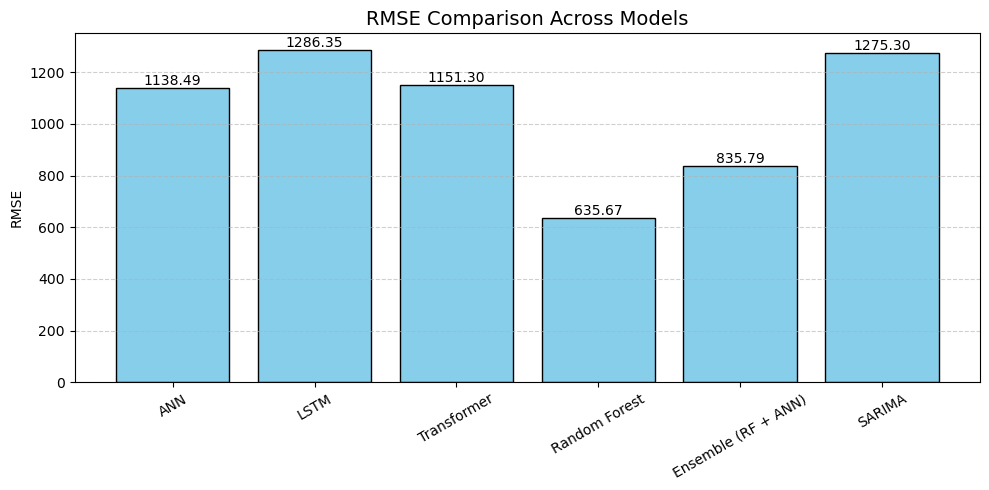

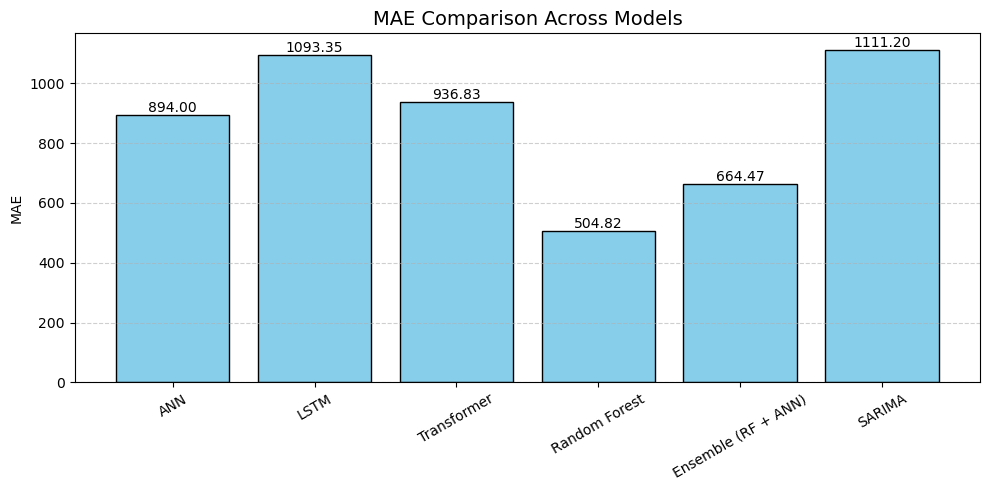

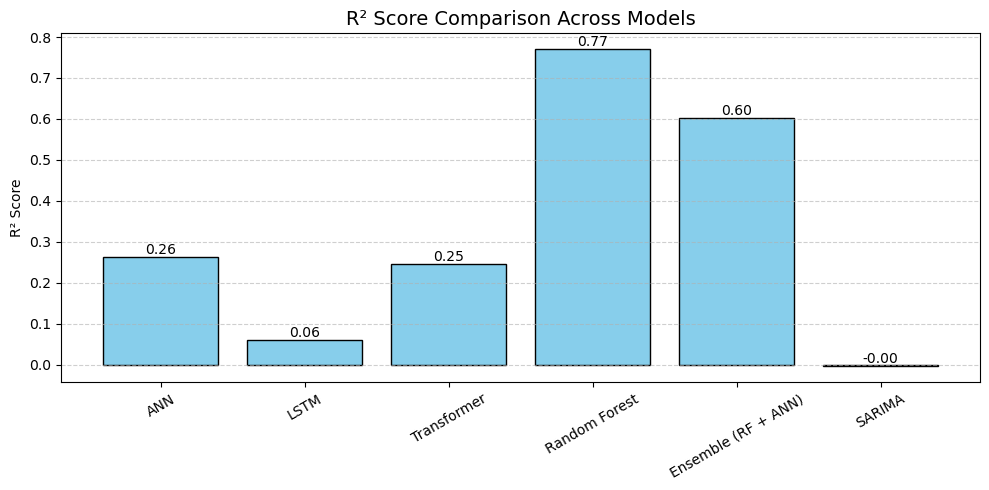

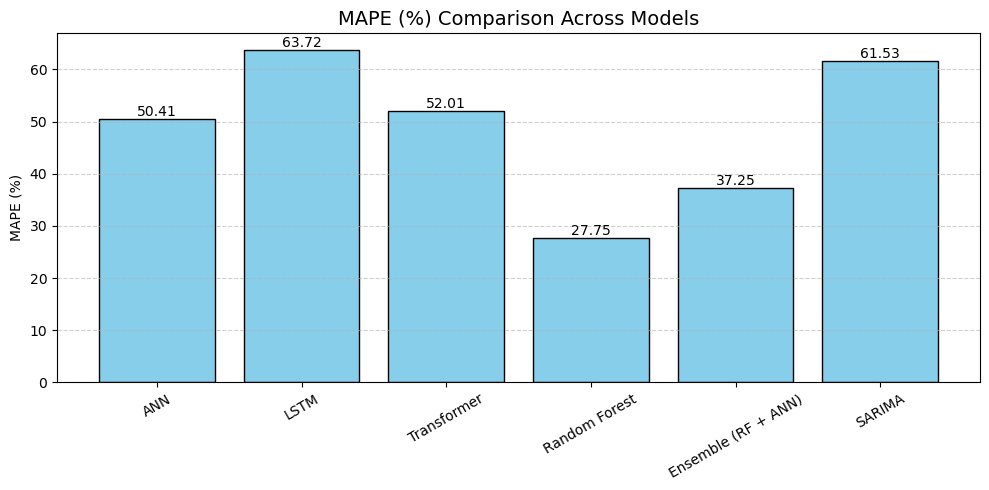

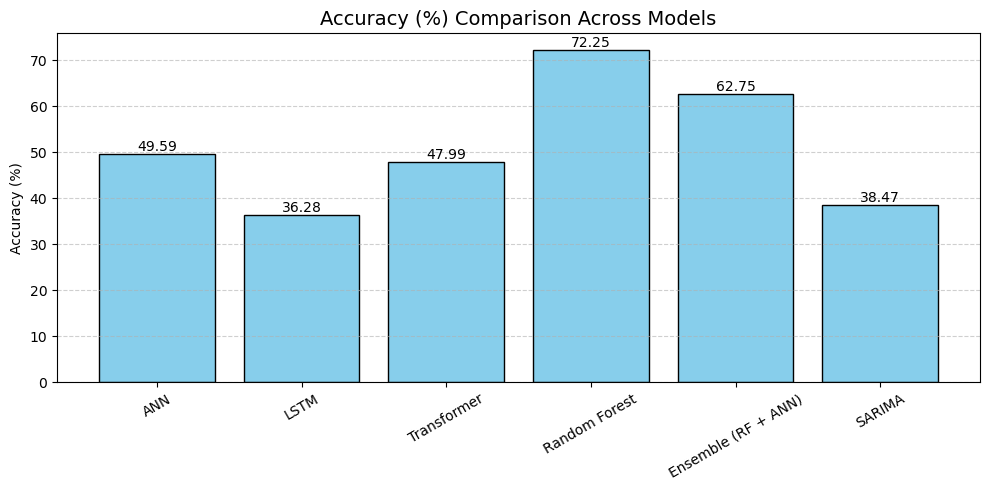

In [14]:
import matplotlib.pyplot as plt

metrics = ['RMSE', 'MAE', 'R² Score', 'MAPE (%)', 'Accuracy (%)']

for metric in metrics:
    plt.figure(figsize=(10, 5))
    bars = plt.bar(comparison_df['Model'], comparison_df[metric], color='skyblue', edgecolor='black')
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height,
                 f'{height:.2f}', ha='center', va='bottom', fontsize=10)

    plt.title(f'{metric} Comparison Across Models', fontsize=14)
    plt.ylabel(metric)
    plt.xticks(rotation=30)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


Hyperparameter tuning

Random Forest

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np

# 🧠 Retrain best RF model (same parameters you got earlier)
best_rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Train
best_rf.fit(X_train, y_train.ravel())

# 🔮 Predict
y_pred_best = best_rf.predict(X_test)

# 🔁 Inverse transform predictions and y_test
y_test_inv = scaler_y.inverse_transform(y_test)
y_pred_inv = scaler_y.inverse_transform(y_pred_best.reshape(-1, 1))

# ➕ Flatten for metric calculations
y_test_inv = y_test_inv.flatten()
y_pred_inv = y_pred_inv.flatten()

# ✅ Calculate metrics
rmse = mean_squared_error(y_test_inv, y_pred_inv, squared=False)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv) * 100
accuracy = 100 - mape

# 📊 Show results
print("📉 RMSE     :", round(rmse, 2))
print("📏 MAE      :", round(mae, 2))
print("📈 R² Score :", round(r2, 4))
print("📊 MAPE     :", round(mape, 2), "%")
print("✅ Accuracy :", round(accuracy, 2), "%")


📉 RMSE     : 627.64
📏 MAE      : 505.49
📈 R² Score : 0.7761
📊 MAPE     : 27.43 %
✅ Accuracy : 72.57 %


C:\Users\Ruchi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Transformer

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Transformer block class
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(embed_dim)
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(0.1)
        self.dropout2 = layers.Dropout(0.1)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

# Build transformer model
def build_transformer(input_shape):
    inputs = layers.Input(shape=input_shape)
    x = TransformerBlock(embed_dim=input_shape[-1], num_heads=2, ff_dim=64)(inputs)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(64, activation="relu")(x)
    outputs = layers.Dense(1)(x)
    model = Model(inputs, outputs)
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    return model

# Reshape data
X_train_seq = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_seq = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build and train
transformer_model = build_transformer(input_shape=(1, X_train.shape[1]))
transformer_model.fit(X_train_seq, y_train, epochs=100, batch_size=16, verbose=1, validation_split=0.1)



Epoch 1/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.1278 - mae: 0.2897 - val_loss: 0.0768 - val_mae: 0.2336
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0778 - mae: 0.2398 - val_loss: 0.0745 - val_mae: 0.2295
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0762 - mae: 0.2376 - val_loss: 0.0732 - val_mae: 0.2303
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0760 - mae: 0.2380 - val_loss: 0.0741 - val_mae: 0.2266
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0739 - mae: 0.2332 - val_loss: 0.0729 - val_mae: 0.2255
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0740 - mae: 0.2341 - val_loss: 0.0724 - val_mae: 0.2259
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0742 - mae: 0.2338 - val_loss: 0.0716 - val_mae: 0.2239
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0721 - mae: 0.2311 - val_loss: 0.0702 - val_mae: 0.2242
Epoch 9/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0

In [17]:
# Predict
y_pred_transformer = transformer_model.predict(X_test_seq).flatten()

# Inverse scale
y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_inv = scaler_y.inverse_transform(y_pred_transformer.reshape(-1, 1)).flatten()

# Metrics
rmse = mean_squared_error(y_test_inv, y_pred_inv, squared=False)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv) * 100
accuracy = 100 - mape

# Results
print("📊 Transformer Evaluation")
print(f"📉 RMSE     : {rmse:.2f}")
print(f"📏 MAE      : {mae:.2f}")
print(f"📈 R² Score : {r2:.4f}")
print(f"📊 MAPE     : {mape:.2f}%")
print(f"✅ Accuracy : {accuracy:.2f}%")


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
📊 Transformer Evaluation
📉 RMSE     : 1061.02
📏 MAE      : 795.65
📈 R² Score : 0.3602
📊 MAPE     : 40.94%
✅ Accuracy : 59.06%


C:\Users\Ruchi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


C:\Users\Ruchi\AppData\Local\Temp\ipykernel_17664\2598710159.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=30, ha='right', fontsize=9)
C:\Users\Ruchi\AppData\Local\Temp\ipykernel_17664\2598710159.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=30, ha='right', fontsize=9)
C:\Users\Ruchi\AppData\Local\Temp\ipykernel_17664\2598710159.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=30, ha='right', fontsize=9)
C:\Users\Ruchi\AppData\Local\Temp\ipykernel_17664\2598710159.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabe

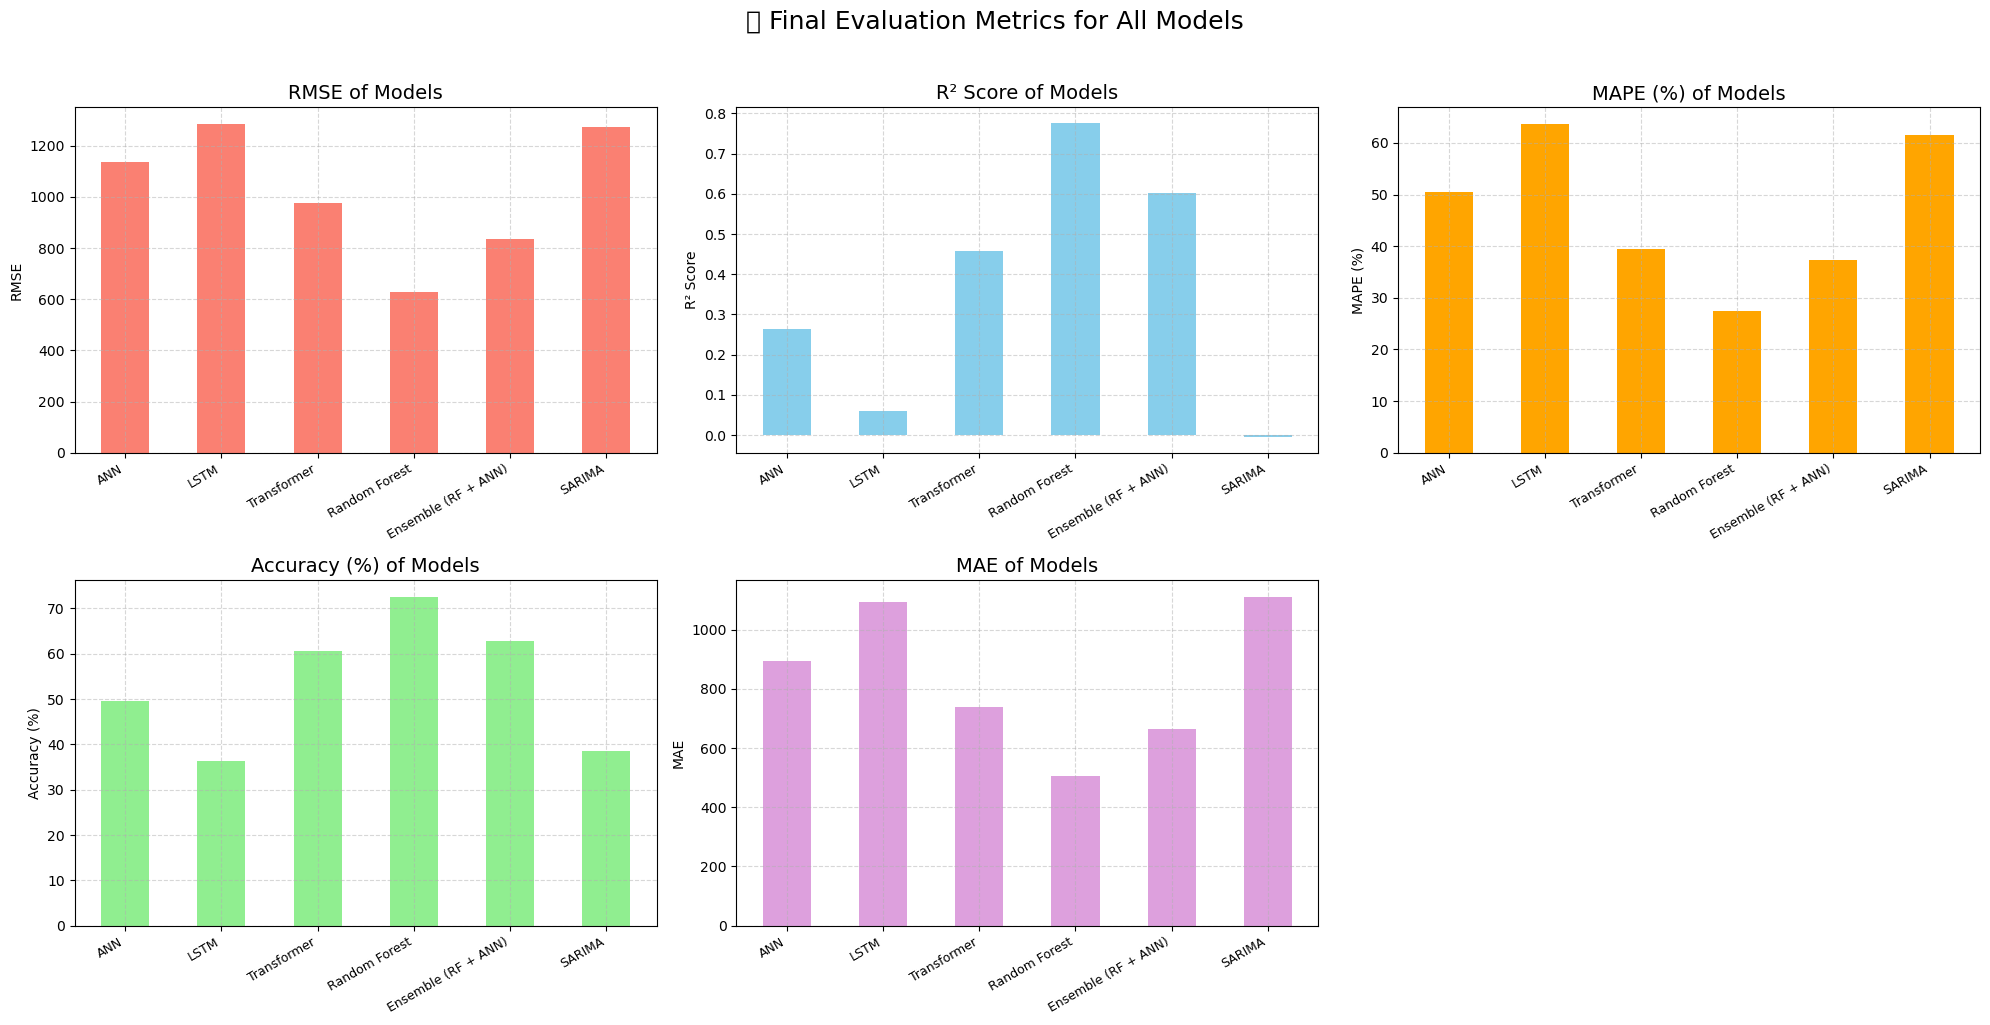

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Models
models = ['ANN', 'LSTM', 'Transformer', 'Random Forest', 'Ensemble (RF + ANN)', 'SARIMA']

# Metrics
rmse = [1138.49, 1286.35, 976.88, 627.64, 835.79, 1275.30]
mae = [894.00, 1093.35, 737.53, 505.49, 664.47, 1111.20]
r2 = [0.2633, 0.0595, 0.4576, 0.7761, 0.6030, -0.0048]
mape = [50.41, 63.72, 39.38, 27.43, 37.25, 61.53]
accuracy = [49.59, 36.28, 60.62, 72.57, 62.75, 38.47]

# Plotting
fig, axs = plt.subplots(2, 3, figsize=(20, 10))  # Increased size
bar_width = 0.5

# Function to plot each metric
def plot_metric(ax, data, title, ylabel, color):
    bars = ax.bar(models, data, color=color, width=bar_width)
    ax.set_title(title, fontsize=14)
    ax.set_ylabel(ylabel)
    ax.set_xticklabels(models, rotation=30, ha='right', fontsize=9)
    ax.grid(True, linestyle='--', alpha=0.5)

# Subplots
plot_metric(axs[0, 0], rmse, "RMSE of Models", "RMSE", 'salmon')
plot_metric(axs[0, 1], r2, "R² Score of Models", "R² Score", 'skyblue')
plot_metric(axs[0, 2], mape, "MAPE (%) of Models", "MAPE (%)", 'orange')
plot_metric(axs[1, 0], accuracy, "Accuracy (%) of Models", "Accuracy (%)", 'lightgreen')
plot_metric(axs[1, 1], mae, "MAE of Models", "MAE", 'plum')

# Remove the empty 6th cell
axs[1, 2].axis('off')

# Final layout
plt.suptitle("📊 Final Evaluation Metrics for All Models", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()


In [19]:
import pandas as pd

# Final metrics data
final_results = {
    "Model": ['ANN', 'LSTM', 'Transformer', 'Random Forest', 'Ensemble (RF + ANN)', 'SARIMA'],
    "RMSE": [1138.49, 1286.35, 976.88, 627.64, 835.79, 1275.30],
    "MAE": [894.00, 1093.35, 737.53, 505.49, 664.47, 1111.20],
    "R² Score": [0.2633, 0.0595, 0.4576, 0.7761, 0.6030, -0.0048],
    "MAPE (%)": [50.41, 63.72, 39.38, 27.43, 37.25, 61.53],
    "Accuracy (%)": [49.59, 36.28, 60.62, 72.57, 62.75, 38.47]
}

# Create DataFrame
df_results = pd.DataFrame(final_results)

# Display
print("\n📊 Final Model Comparison Table:\n")
print(df_results)



📊 Final Model Comparison Table:

                 Model     RMSE      MAE  R² Score  MAPE (%)  Accuracy (%)
0                  ANN  1138.49   894.00    0.2633     50.41         49.59
1                 LSTM  1286.35  1093.35    0.0595     63.72         36.28
2          Transformer   976.88   737.53    0.4576     39.38         60.62
3        Random Forest   627.64   505.49    0.7761     27.43         72.57
4  Ensemble (RF + ANN)   835.79   664.47    0.6030     37.25         62.75
5               SARIMA  1275.30  1111.20   -0.0048     61.53         38.47


In [20]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# 👇 Number of months to forecast
n_months = 12

# 📅 Get last known date
last_date = pd.to_datetime(f"{int(df['Year'].iloc[-1])}-{int(df['Month'].iloc[-1])}-01")
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_months, freq='M')

# 🧪 Prepare future feature rows
future_df = pd.DataFrame()
future_df['Year'] = future_dates.year
future_df['Month'] = future_dates.month
future_df['Day'] = future_dates.day

# Fill climate columns with average values from your dataset
for col in [
    "Sea_Surface_Temperature_C", "Wave_Height_m", "Wave_Period_s",
    "Wind_Speed_mps", "Salinity_PSU", "Dissolved_Oxygen_mg_L",
    "pH_Level", "Air_Pressure_hPa", "Chlorophyll_a_mg_m3"
]:
    future_df[col] = df[col].mean()

# Rearranged column order to match training
future_X = future_df[[
    "Sea_Surface_Temperature_C", "Wave_Height_m", "Wave_Period_s",
    "Wind_Speed_mps", "Salinity_PSU", "Dissolved_Oxygen_mg_L",
    "pH_Level", "Air_Pressure_hPa", "Chlorophyll_a_mg_m3",
    "Year", "Month", "Day"
]]

# 🧼 Scale using same scaler
future_X_scaled = scaler_X.transform(future_X)

# 🔮 Predict
future_preds_scaled = best_rf.predict(future_X_scaled)
future_preds = scaler_y.inverse_transform(future_preds_scaled.reshape(-1, 1)).flatten()

# 📊 Combine results
forecast_df = pd.DataFrame({
    "Month": future_dates.strftime("%Y-%m"),
    "Predicted_Fish_Landing_Tonnes": future_preds
})

print(forecast_df)


      Month  Predicted_Fish_Landing_Tonnes
0   2030-06                    3590.863446
1   2030-07                    3580.518867
2   2030-08                    3558.187693
3   2030-09                    3581.883962
4   2030-10                    3573.778204
5   2030-11                    3594.694862
6   2030-12                    3580.129432
7   2031-01                    3566.938407
8   2031-02                    3591.156738
9   2031-03                    3553.030509
10  2031-04                    3571.932196
11  2031-05                    3551.249649


C:\Users\Ruchi\AppData\Local\Temp\ipykernel_17664\962358274.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_months, freq='M')
C:\Users\Ruchi\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [21]:
import pandas as pd
import numpy as np

# 👇 Set fixed future date range for 2024
future_dates = pd.date_range(start="2024-01-01", end="2024-12-31", freq='M')

# 🧪 Prepare future input data
future_df = pd.DataFrame()
future_df['Year'] = future_dates.year
future_df['Month'] = future_dates.month
future_df['Day'] = future_dates.day

# Fill climate columns with average values from original dataset
for col in [
    "Sea_Surface_Temperature_C", "Wave_Height_m", "Wave_Period_s",
    "Wind_Speed_mps", "Salinity_PSU", "Dissolved_Oxygen_mg_L",
    "pH_Level", "Air_Pressure_hPa", "Chlorophyll_a_mg_m3"
]:
    future_df[col] = df[col].mean()

# Match training feature column order
future_X = future_df[[
    "Sea_Surface_Temperature_C", "Wave_Height_m", "Wave_Period_s",
    "Wind_Speed_mps", "Salinity_PSU", "Dissolved_Oxygen_mg_L",
    "pH_Level", "Air_Pressure_hPa", "Chlorophyll_a_mg_m3",
    "Year", "Month", "Day"
]]

# Scale using the same feature scaler
future_X_scaled = scaler_X.transform(future_X)

# Predict using trained Random Forest model
future_preds_scaled = best_rf.predict(future_X_scaled)

# Inverse scale the predictions
future_preds = scaler_y.inverse_transform(future_preds_scaled.reshape(-1, 1)).flatten()

# Combine into forecast DataFrame
forecast_df = pd.DataFrame({
    "Month": future_dates.strftime("%Y-%m"),
    "Predicted_Fish_Landing_Tonnes": future_preds
})

# Show forecast
print("📈 Predicted Fish Landing (Jan 2024 - Dec 2024):")
print(forecast_df)


📈 Predicted Fish Landing (Jan 2024 - Dec 2024):
      Month  Predicted_Fish_Landing_Tonnes
0   2024-01                    3535.064048
1   2024-02                    3563.272303
2   2024-03                    3542.978232
3   2024-04                    3567.304224
4   2024-05                    3566.029020
5   2024-06                    3592.171000
6   2024-07                    3582.545310
7   2024-08                    3569.535139
8   2024-09                    3595.252306
9   2024-10                    3586.581414
10  2024-11                    3604.318062
11  2024-12                    3577.663213


C:\Users\Ruchi\AppData\Local\Temp\ipykernel_17664\2668908808.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start="2024-01-01", end="2024-12-31", freq='M')
C:\Users\Ruchi\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


C:\Users\Ruchi\AppData\Local\Temp\ipykernel_17664\301014628.py:12: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Ruchi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


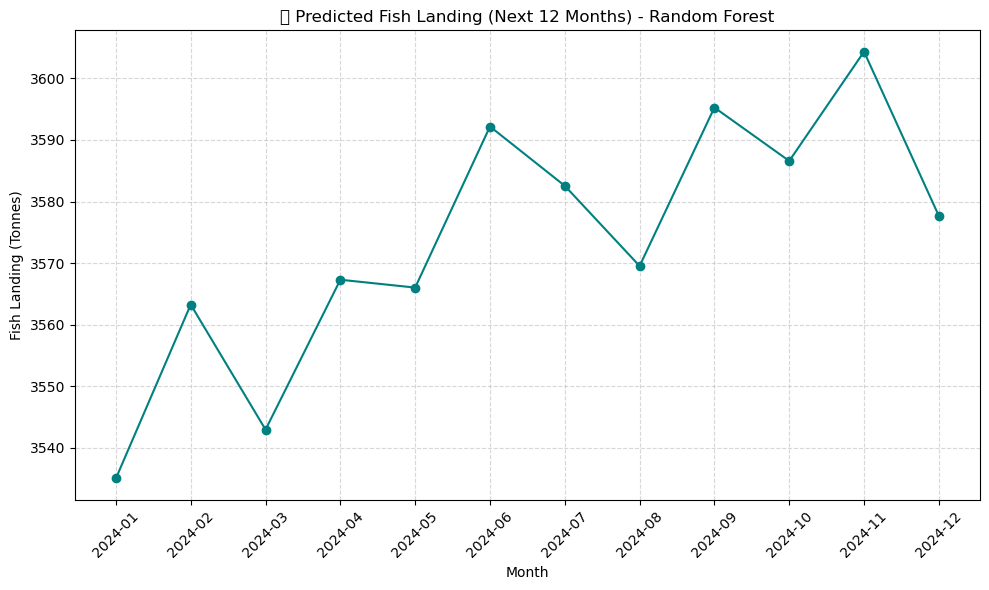

In [22]:
import matplotlib.pyplot as plt

# 🧾 Plot
plt.figure(figsize=(10, 6))
plt.plot(forecast_df['Month'], forecast_df['Predicted_Fish_Landing_Tonnes'], marker='o', linestyle='-', color='teal')

plt.title("📈 Predicted Fish Landing (Next 12 Months) - Random Forest")
plt.xlabel("Month")
plt.ylabel("Fish Landing (Tonnes)")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\Ruchi\AppData\Local\Temp\ipykernel_17664\23014392.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Ruchi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


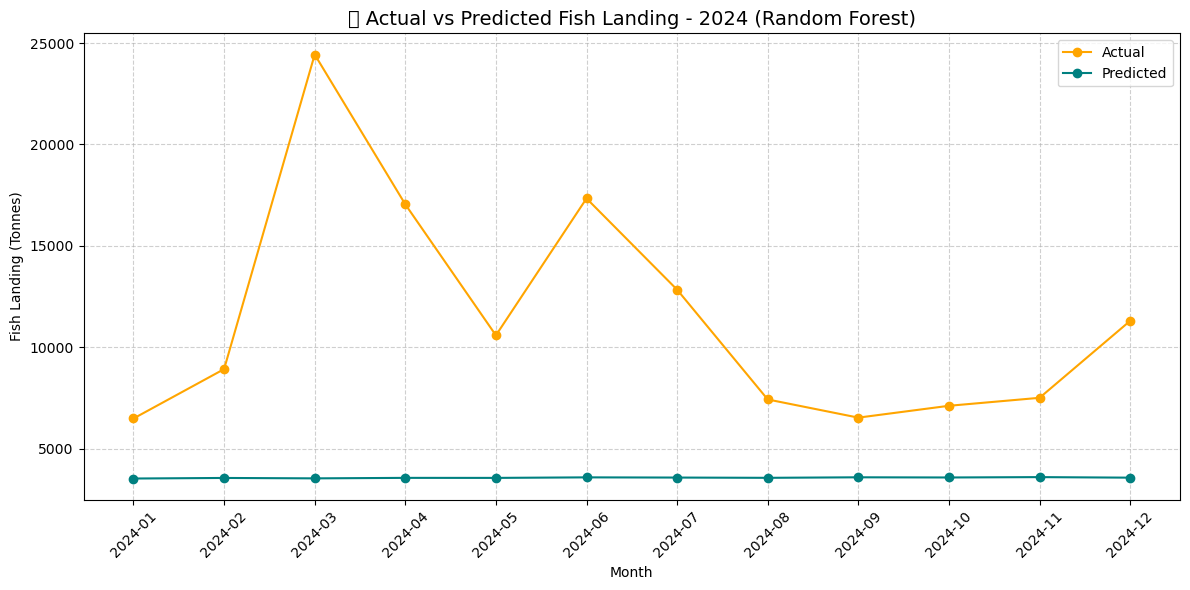

In [23]:
import matplotlib.pyplot as plt

# 🧾 Prepare actual values (ensure 'Month' column format matches forecast_df)
actual_2024_df = df[(df['Year'] == 2024)].copy()
actual_2024_df['Month'] = pd.to_datetime(actual_2024_df[['Year', 'Month']].assign(DAY=1)).dt.strftime('%Y-%m')

# 🎯 Group if multiple districts / entries per month
actual_monthly = actual_2024_df.groupby('Month')['Total_Fish_Landing_Tonnes'].sum().reset_index()

# 🟦 Forecasted data already exists
forecast_2024_df = forecast_df.copy()
forecast_2024_df = forecast_2024_df[forecast_2024_df['Month'].isin(actual_monthly['Month'])]  # Align with actual

# 🖼️ Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(actual_monthly['Month'], actual_monthly['Total_Fish_Landing_Tonnes'], label="Actual", marker='o', color='orange')
plt.plot(forecast_2024_df['Month'], forecast_2024_df['Predicted_Fish_Landing_Tonnes'], label="Predicted", marker='o', color='teal')

plt.title("📊 Actual vs Predicted Fish Landing - 2024 (Random Forest)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Fish Landing (Tonnes)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [24]:
import pandas as pd
import numpy as np

# 👇 Set fixed future date range for 2024
future_dates = pd.date_range(start="2024-01-01", end="2024-12-31", freq='M')

# 🧪 Prepare future input data
future_df = pd.DataFrame()
future_df['Year'] = future_dates.year
future_df['Month'] = future_dates.month
future_df['Day'] = future_dates.day

# Fill climate columns with average values from original dataset
for col in [
    "Sea_Surface_Temperature_C", "Wave_Height_m", "Wave_Period_s",
    "Wind_Speed_mps", "Salinity_PSU", "Dissolved_Oxygen_mg_L",
    "pH_Level", "Air_Pressure_hPa", "Chlorophyll_a_mg_m3"
]:
    future_df[col] = df[col].mean()

# Match training feature column order
future_X = future_df[[
    "Sea_Surface_Temperature_C", "Wave_Height_m", "Wave_Period_s",
    "Wind_Speed_mps", "Salinity_PSU", "Dissolved_Oxygen_mg_L",
    "pH_Level", "Air_Pressure_hPa", "Chlorophyll_a_mg_m3",
    "Year", "Month", "Day"
]]

# Scale using the same feature scaler
future_X_scaled = scaler_X.transform(future_X)

# Predict using trained Random Forest model
future_preds_scaled = best_rf.predict(future_X_scaled)

# Inverse scale the predictions
future_preds = scaler_y.inverse_transform(future_preds_scaled.reshape(-1, 1)).flatten()

# 📅 Format month labels
month_labels = future_dates.strftime("%Y-%m")

# 📌 Fetch actual values for those months (if available)
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
actual_df = df[(df['Date'] >= "2024-01-01") & (df['Date'] <= "2024-12-31")]
actual_monthly = actual_df.groupby(actual_df['Date'].dt.to_period("M"))['Total_Fish_Landing_Tonnes'].mean()
actual_monthly.index = actual_monthly.index.astype(str)

# 🧾 Combine actual and predicted
forecast_df = pd.DataFrame({
    "Month": month_labels,
    "Predicted_Fish_Landing_Tonnes": future_preds,
    "Actual_Fish_Landing_Tonnes": [actual_monthly.get(m, np.nan) for m in month_labels]
})

# Display result
print("📈 Actual vs Predicted Fish Landing (Jan 2024 - Dec 2024):")
print(forecast_df)


📈 Actual vs Predicted Fish Landing (Jan 2024 - Dec 2024):
      Month  Predicted_Fish_Landing_Tonnes  Actual_Fish_Landing_Tonnes
0   2024-01                    3535.064048                 3246.930000
1   2024-02                    3563.272303                 4464.020000
2   2024-03                    3542.978232                 3054.318750
3   2024-04                    3567.304224                 2841.588333
4   2024-05                    3566.029020                 1765.541667
5   2024-06                    3592.171000                 4335.237500
6   2024-07                    3582.545310                 3210.590000
7   2024-08                    3569.535139                 1858.072500
8   2024-09                    3595.252306                 3268.190000
9   2024-10                    3586.581414                 1780.087500
10  2024-11                    3604.318062                 2504.533333
11  2024-12                    3577.663213                 2826.722500


C:\Users\Ruchi\AppData\Local\Temp\ipykernel_17664\1850136351.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start="2024-01-01", end="2024-12-31", freq='M')
C:\Users\Ruchi\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


C:\Users\Ruchi\AppData\Local\Temp\ipykernel_17664\3074591806.py:14: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Ruchi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


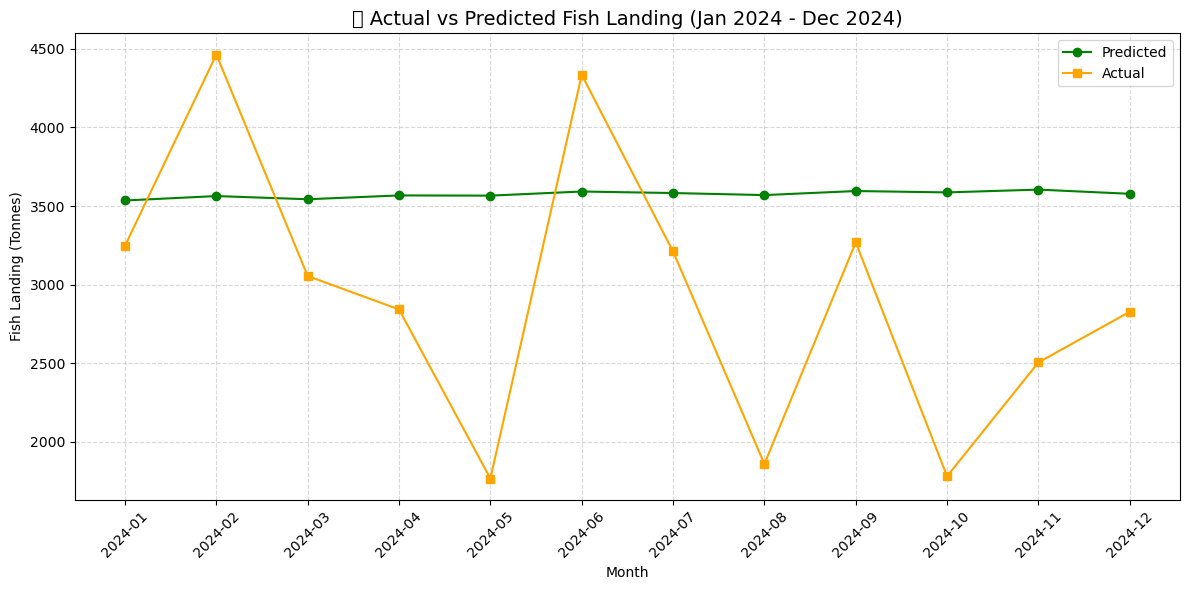

In [25]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(forecast_df['Month'], forecast_df['Predicted_Fish_Landing_Tonnes'], marker='o', label='Predicted', color='green')
plt.plot(forecast_df['Month'], forecast_df['Actual_Fish_Landing_Tonnes'], marker='s', label='Actual', color='orange')

plt.title("📈 Actual vs Predicted Fish Landing (Jan 2024 - Dec 2024)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Fish Landing (Tonnes)")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [26]:
from datetime import datetime
import pandas as pd

# Set correct start date manually as Jan 2025
start_date = pd.to_datetime("2025-01-01")

# Generate next 24 months (till Dec 2026)
future_dates = pd.date_range(start=start_date, periods=24, freq='M')

# Create future DataFrame with averaged features
future_df = pd.DataFrame()
future_df['Year'] = future_dates.year
future_df['Month'] = future_dates.month
future_df['Day'] = future_dates.day

# Fill other climate features with average of original dataset
for col in [
    "Sea_Surface_Temperature_C", "Wave_Height_m", "Wave_Period_s",
    "Wind_Speed_mps", "Salinity_PSU", "Dissolved_Oxygen_mg_L",
    "pH_Level", "Air_Pressure_hPa", "Chlorophyll_a_mg_m3"
]:
    future_df[col] = df[col].mean()

# Reorder columns
future_X = future_df[[
    "Sea_Surface_Temperature_C", "Wave_Height_m", "Wave_Period_s",
    "Wind_Speed_mps", "Salinity_PSU", "Dissolved_Oxygen_mg_L",
    "pH_Level", "Air_Pressure_hPa", "Chlorophyll_a_mg_m3",
    "Year", "Month", "Day"
]]

# Scale, Predict, Inverse scale
future_X_scaled = scaler_X.transform(future_X)
future_preds_scaled = best_rf.predict(future_X_scaled)
future_preds = scaler_y.inverse_transform(future_preds_scaled.reshape(-1, 1)).flatten()

# Create final forecast DataFrame
forecast_df = pd.DataFrame({
    "Month": future_dates.strftime("%Y-%m"),
    "Predicted_Fish_Landing_Tonnes": future_preds
})

# ✅ DONE! Now print
print(forecast_df)


      Month  Predicted_Fish_Landing_Tonnes
0   2025-01                    3529.132188
1   2025-02                    3559.558619
2   2025-03                    3537.148397
3   2025-04                    3567.662250
4   2025-05                    3565.320860
5   2025-06                    3598.784560
6   2025-07                    3589.158870
7   2025-08                    3576.148700
8   2025-09                    3601.865866
9   2025-10                    3593.307808
10  2025-11                    3611.079139
11  2025-12                    3584.424290
12  2026-01                    3529.076306
13  2026-02                    3559.502736
14  2026-03                    3537.092514
15  2026-04                    3567.606367
16  2026-05                    3565.264977
17  2026-06                    3599.207530
18  2026-07                    3589.581840
19  2026-08                    3568.811128
20  2026-09                    3594.528294
21  2026-10                    3585.970236
22  2026-11

C:\Users\Ruchi\AppData\Local\Temp\ipykernel_17664\962827704.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=start_date, periods=24, freq='M')
C:\Users\Ruchi\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


C:\Users\Ruchi\AppData\Local\Temp\ipykernel_17664\473285202.py:12: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Ruchi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


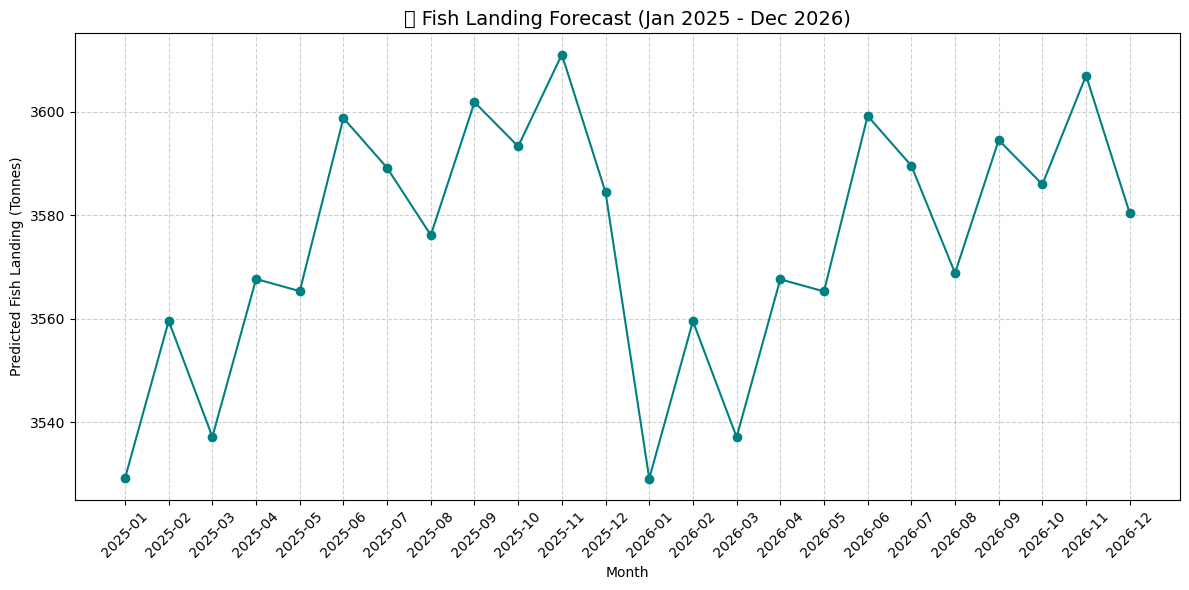

In [27]:
import matplotlib.pyplot as plt

# 📈 Line plot of future predictions
plt.figure(figsize=(12, 6))
plt.plot(forecast_df['Month'], forecast_df['Predicted_Fish_Landing_Tonnes'], marker='o', linestyle='-', color='teal')

plt.title("📅 Fish Landing Forecast (Jan 2025 - Dec 2026)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Predicted Fish Landing (Tonnes)")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Training Random Forest model...
Random Forest - RMSE: 783.51, R²: 0.6511
Training Transformer-inspired model...
Epoch [20/100], Loss: 0.0324
Epoch [40/100], Loss: 0.0191
Epoch [60/100], Loss: 0.0092
Epoch [80/100], Loss: 0.0110
Epoch [100/100], Loss: 0.0086
Transformer - RMSE: 497.07, R²: 0.8596
Training RFF + ANN Ensemble model...
Epoch [20/100], Loss: 0.0529
Epoch [40/100], Loss: 0.0392
Epoch [60/100], Loss: 0.0307
Epoch [80/100], Loss: 0.0340
Epoch [100/100], Loss: 0.0184
RFF + ANN Ensemble - RMSE: 1080.02, R²: 0.3370


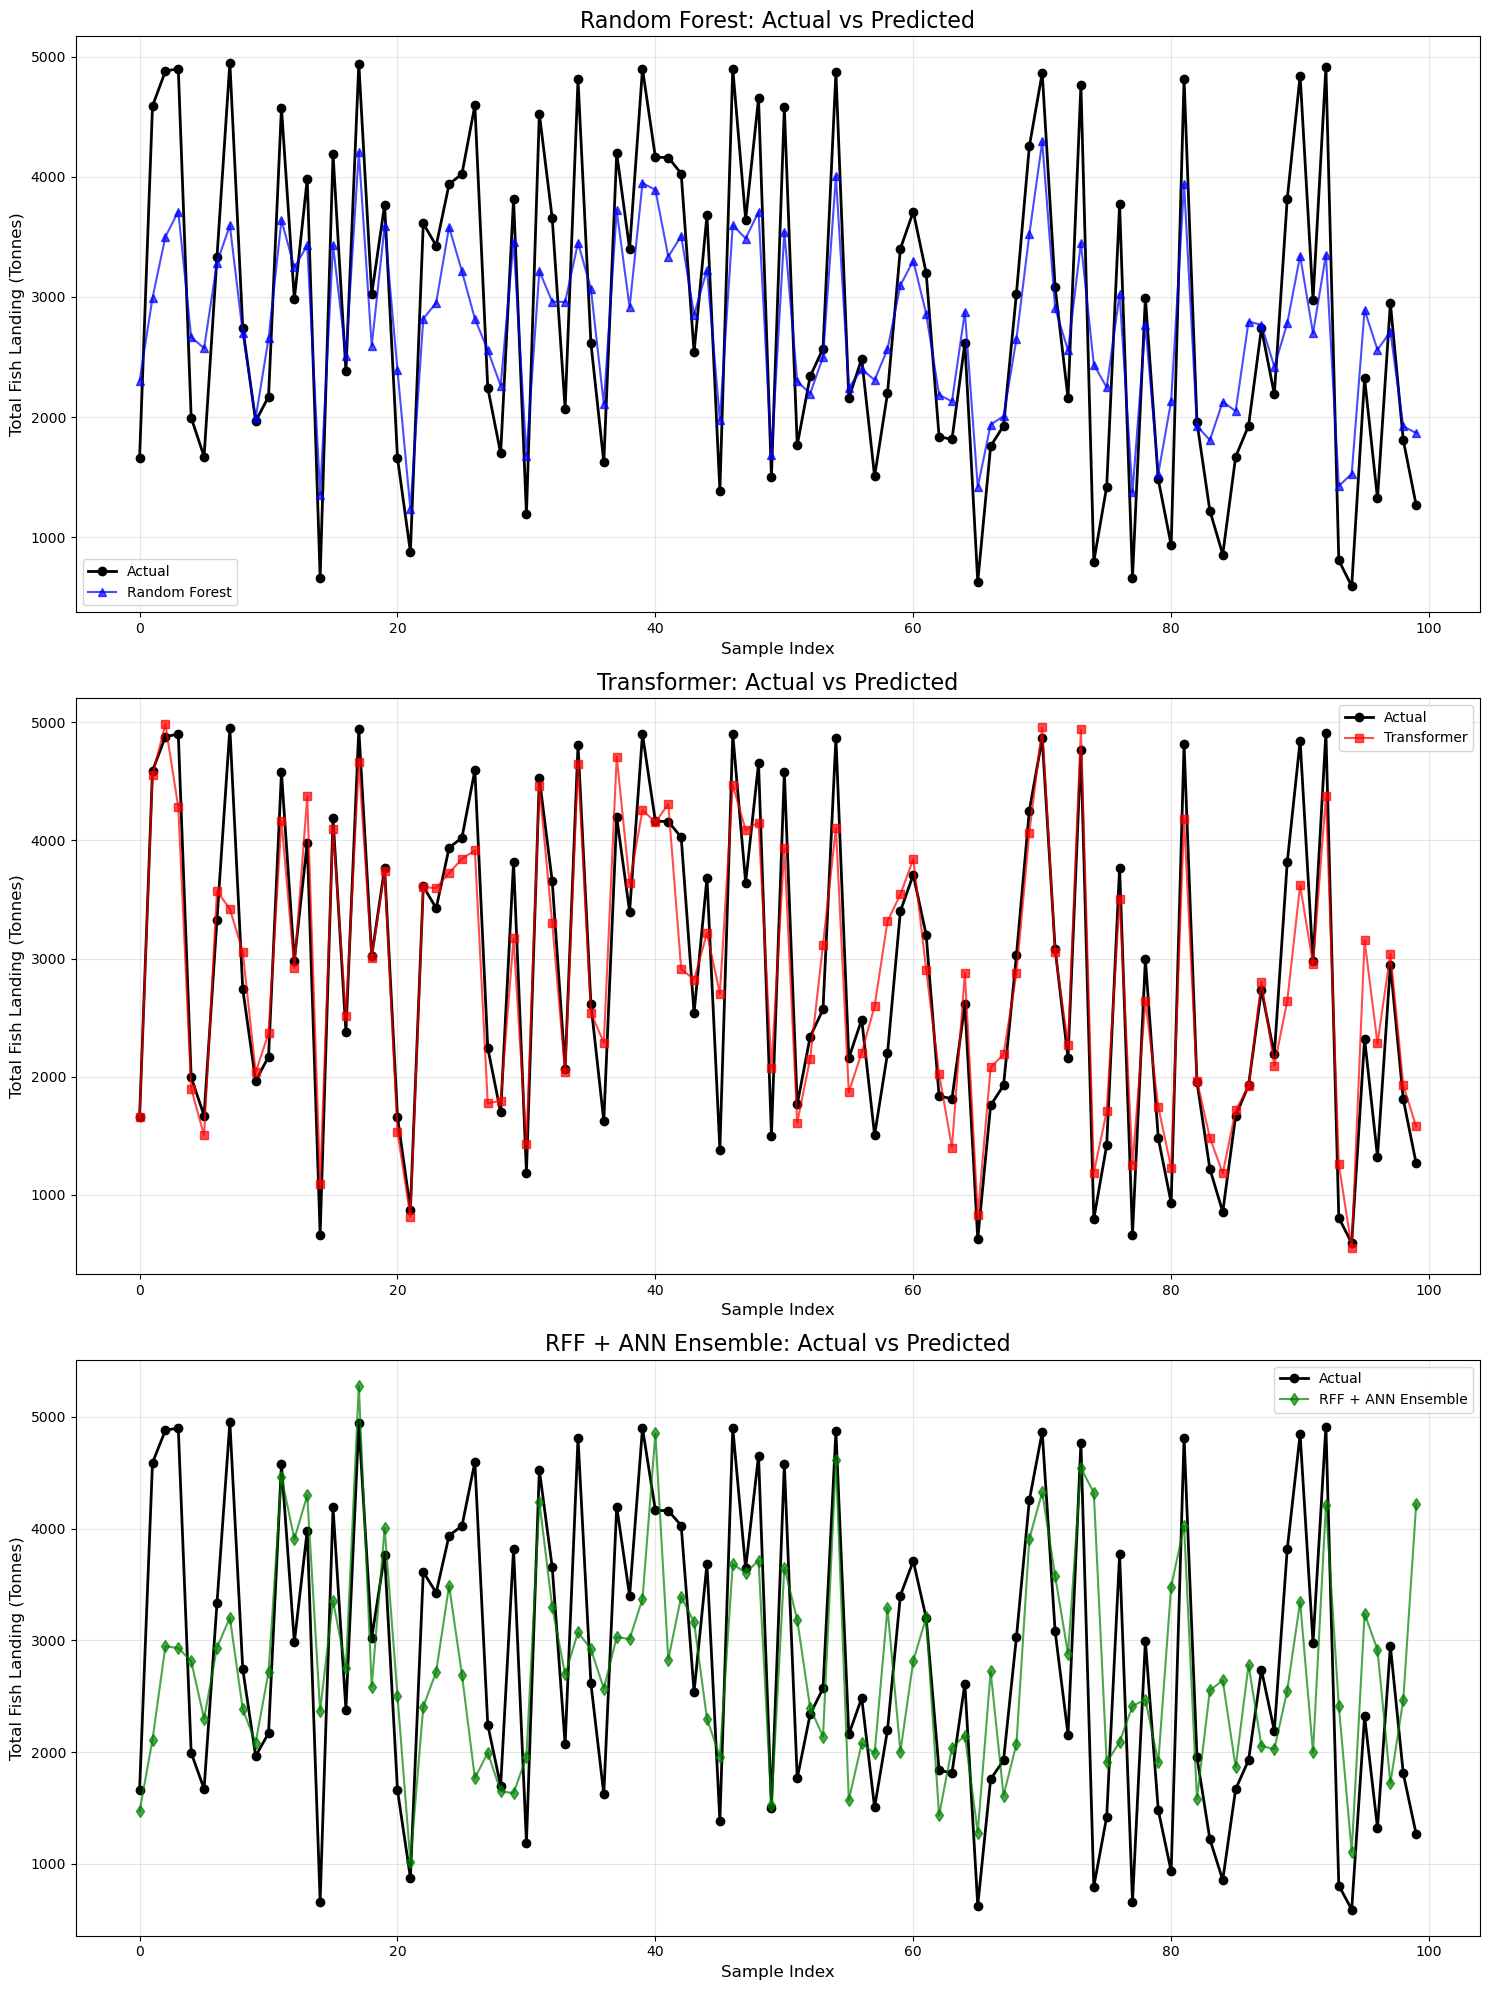

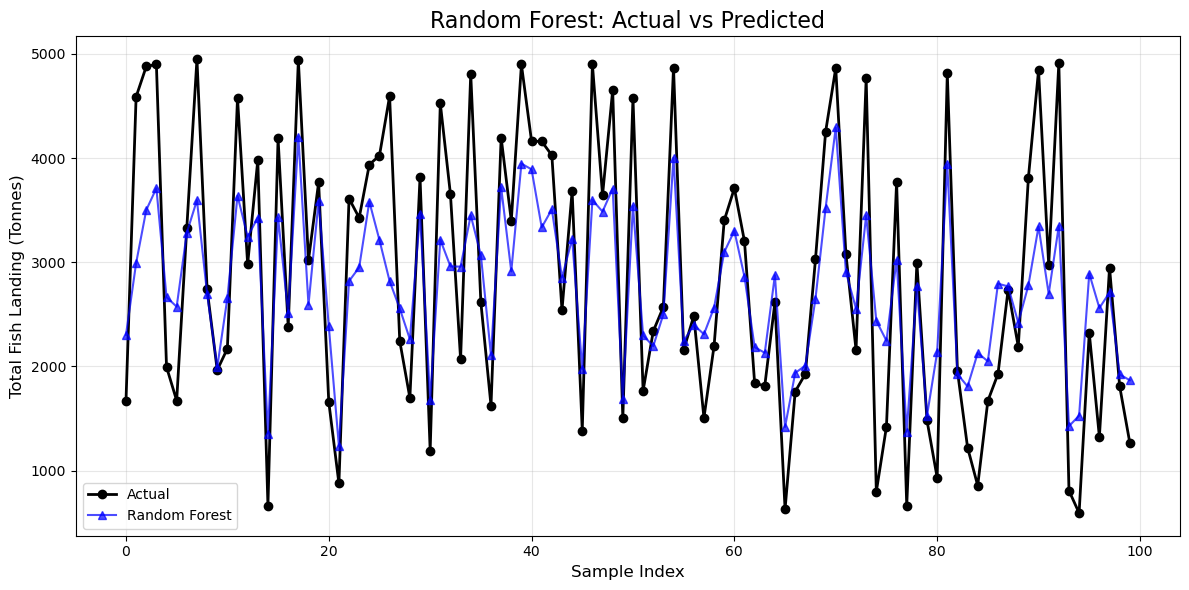

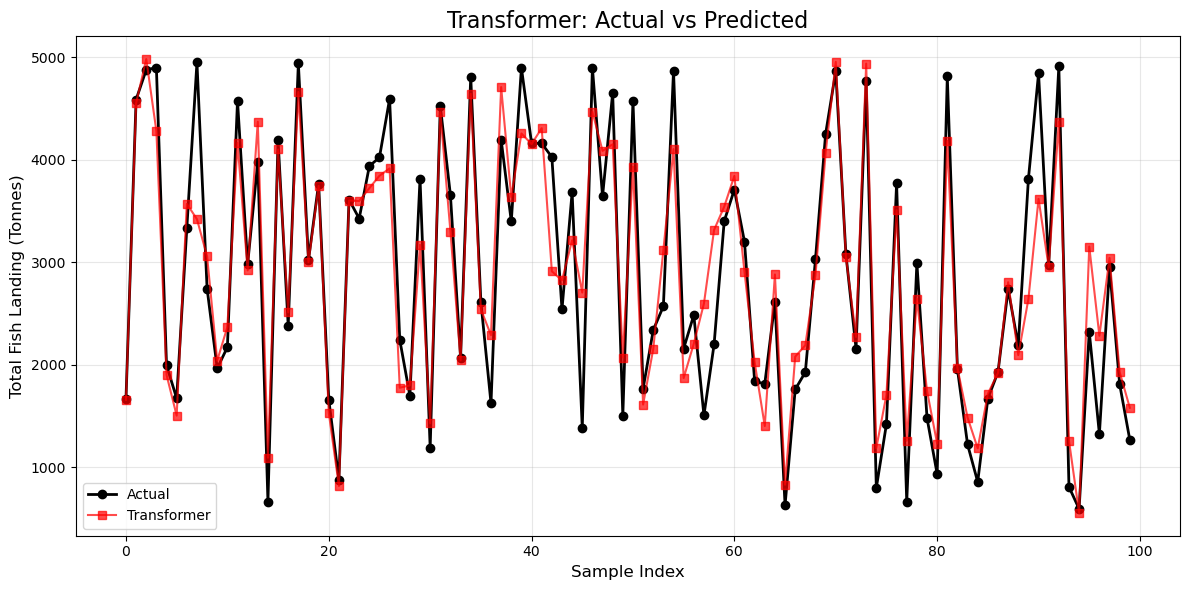

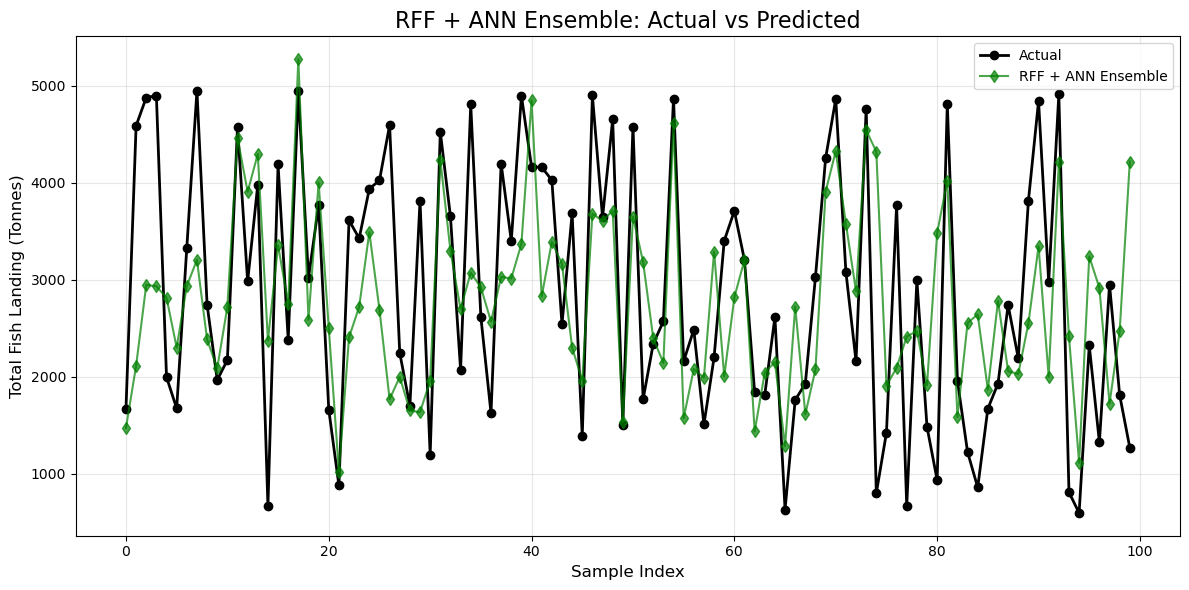


MODEL PERFORMANCE COMPARISON
Model                RMSE       R²        
--------------------------------------------------
Random Forest        783.51     0.6511    
Transformer          497.07     0.8596    
RFF + ANN Ensemble   1080.02    0.3370    

Feature Importance Ranking:
--------------------------------------------------
1. Wind_Speed_mps                 0.1663
2. Dissolved_Oxygen_mg_L          0.1320
3. Wave_Height_m                  0.1313
4. Wave_Period_s                  0.1190
5. Chlorophyll_a_mg_m3            0.1167
6. Sea_Surface_Temperature_C      0.1098
7. pH_Level                       0.0837
8. Salinity_PSU                   0.0776
9. Air_Pressure_hPa               0.0248
10. Month                          0.0173
11. Day                            0.0141
12. Year                           0.0074


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)
torch.manual_seed(42)

# Load and prepare data
def load_data(file_path):
    """Load and preprocess the CSV data"""
    df2 = pd.read_csv("../data/Fish_Population_Expanded_2000.csv")
    
    # Convert Date to Year, Month, Day
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    
    # Define features and target
    features = [
        "Sea_Surface_Temperature_C", "Wave_Height_m", "Wave_Period_s", 
        "Wind_Speed_mps", "Salinity_PSU", "Dissolved_Oxygen_mg_L", 
        "pH_Level", "Air_Pressure_hPa", "Chlorophyll_a_mg_m3", 
        "Year", "Month", "Day"
    ]
    target = "Total_Fish_Landing_Tonnes"
    
    # Split data
    X = df[features]
    y = df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale features
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    
    # Reshape y for scaling
    y_train_reshaped = y_train.values.reshape(-1, 1)
    y_test_reshaped = y_test.values.reshape(-1, 1)
    
    y_train_scaled = scaler_y.fit_transform(y_train_reshaped).flatten()
    y_test_scaled = scaler_y.transform(y_test_reshaped).flatten()
    
    return (X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, 
            X_train, X_test, y_train, y_test, scaler_y, features)

# 1. Random Forest Model
def train_random_forest(X_train, y_train, X_test, y_test, scaler_y):
    """Train and evaluate a Random Forest model"""
    print("Training Random Forest model...")
    rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_scaled = rf_model.predict(X_test)
    
    # Convert predictions back to original scale for evaluation
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
    y_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
    r2 = r2_score(y_actual, y_pred)
    
    print(f"Random Forest - RMSE: {rmse:.2f}, R²: {r2:.4f}")
    
    return rf_model, y_pred

# 2. Neural Network with Self-Attention (Transformer-inspired)
class SelfAttention(nn.Module):
    """Self-attention mechanism for the transformer-inspired model"""
    def __init__(self, embed_size, heads):
        super(SelfAttention, self).__init__()
        self.embed_size = embed_size
        self.heads = heads
        self.head_dim = embed_size // heads
        
        assert (self.head_dim * heads == embed_size), "Embed size needs to be divisible by heads"
        
        self.values = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.keys = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.queries = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.fc_out = nn.Linear(heads * self.head_dim, embed_size)
        
    def forward(self, values, keys, query):
        N = query.shape[0]  # batch size
        value_len, key_len, query_len = values.shape[1], keys.shape[1], query.shape[1]
        
        # Split the embedding into self.heads different pieces
        values = values.reshape(N, value_len, self.heads, self.head_dim)
        keys = keys.reshape(N, key_len, self.heads, self.head_dim)
        query = query.reshape(N, query_len, self.heads, self.head_dim)
        
        values = self.values(values)
        keys = self.keys(keys)
        queries = self.queries(query)
        
        # Scaled dot-product attention
        energy = torch.einsum("nqhd,nkhd->nhqk", [queries, keys])
        attention = torch.softmax(energy / (self.embed_size ** (1/2)), dim=3)
        
        out = torch.einsum("nhql,nlhd->nqhd", [attention, values]).reshape(
            N, query_len, self.heads * self.head_dim
        )
        
        out = self.fc_out(out)
        return out

class TransformerBlock(nn.Module):
    def __init__(self, embed_size, heads, dropout, forward_expansion):
        super(TransformerBlock, self).__init__()
        self.attention = SelfAttention(embed_size, heads)
        self.norm1 = nn.LayerNorm(embed_size)
        self.norm2 = nn.LayerNorm(embed_size)
        
        self.feed_forward = nn.Sequential(
            nn.Linear(embed_size, forward_expansion * embed_size),
            nn.ReLU(),
            nn.Linear(forward_expansion * embed_size, embed_size),
        )
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, value, key, query):
        attention = self.attention(value, key, query)
        
        # Add and norm (first residual connection)
        x = self.norm1(attention + query)
        x = self.dropout(x)
        
        # Feed forward
        forward = self.feed_forward(x)
        
        # Add and norm (second residual connection)
        out = self.norm2(forward + x)
        out = self.dropout(out)
        return out

class TransformerRegressor(nn.Module):
    def __init__(self, input_size, embed_size=64, num_layers=3, heads=4, forward_expansion=4, dropout=0.1):
        super(TransformerRegressor, self).__init__()
        
        self.embed_size = embed_size
        self.input_embedding = nn.Linear(1, embed_size)  # Embed each feature individually
        
        self.transformer_blocks = nn.ModuleList(
            [
                TransformerBlock(
                    embed_size=embed_size,
                    heads=heads,
                    dropout=dropout,
                    forward_expansion=forward_expansion,
                )
                for _ in range(num_layers)
            ]
        )
        
        self.fc_out = nn.Sequential(
            nn.Linear(embed_size * input_size, 128),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(64, 1)
        )
        
    def forward(self, x):
        # x shape: (batch_size, seq_len) -> (batch_size, seq_len, 1)
        x = x.unsqueeze(-1)
        
        # Embed each feature: (batch_size, seq_len, embed_size)
        x = self.input_embedding(x)
        
        # Apply transformer blocks
        for block in self.transformer_blocks:
            x = block(x, x, x)
        
        # Flatten: (batch_size, seq_len * embed_size)
        x = x.reshape(x.shape[0], -1)
        
        # Output layer
        return self.fc_out(x).squeeze()

def train_transformer(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, scaler_y, batch_size=32, epochs=100):
    """Train and evaluate a Transformer-inspired model"""
    print("Training Transformer-inspired model...")
    
    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train_scaled)
    y_train_tensor = torch.FloatTensor(y_train_scaled)
    X_test_tensor = torch.FloatTensor(X_test_scaled)
    y_test_tensor = torch.FloatTensor(y_test_scaled)
    
    # Create datasets and dataloaders
    class FishDataset(Dataset):
        def __init__(self, features, targets):
            self.features = features
            self.targets = targets
            
        def __len__(self):
            return len(self.features)
        
        def __getitem__(self, idx):
            return self.features[idx], self.targets[idx]
    
    train_dataset = FishDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    # Initialize model
    input_size = X_train_scaled.shape[1]
    model = TransformerRegressor(input_size=input_size)
    
    # Loss and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Training loop
    for epoch in range(epochs):
        model.train()
        for features, targets in train_loader:
            # Forward pass
            outputs = model(features)
            loss = criterion(outputs, targets)
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        # Print progress every 10 epochs
        if (epoch + 1) % 20 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")
    
    # Evaluation
    model.eval()
    with torch.no_grad():
        y_pred_scaled = model(X_test_tensor).numpy()
        
    # Convert predictions back to original scale
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
    y_actual = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
    r2 = r2_score(y_actual, y_pred)
    
    print(f"Transformer - RMSE: {rmse:.2f}, R²: {r2:.4f}")
    
    return model, y_pred

# 3. Random Fourier Features (RFF) + Neural Network Ensemble
class RFFLayer(nn.Module):
    """Random Fourier Features layer"""
    def __init__(self, input_dim, output_dim, sigma=1.0):
        super(RFFLayer, self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.sigma = sigma
        
        # Random weights with normal distribution
        self.weights = nn.Parameter(torch.randn(input_dim, output_dim) * (1.0 / sigma), requires_grad=False)
        self.bias = nn.Parameter(2 * np.pi * torch.rand(output_dim), requires_grad=False)
        
    def forward(self, x):
        # Project input
        projection = torch.matmul(x, self.weights) + self.bias
        # Apply cosine activation
        return torch.cos(projection) * np.sqrt(2.0 / self.output_dim)

class RFFEnsembleModel(nn.Module):
    """Ensemble model combining RFF with a neural network"""
    def __init__(self, input_dim, rff_dim=128):
        super(RFFEnsembleModel, self).__init__()
        self.rff = RFFLayer(input_dim, rff_dim)
        
        self.nn = nn.Sequential(
            nn.Linear(rff_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 1)
        )
        
    def forward(self, x):
        x = self.rff(x)
        return self.nn(x).squeeze()

def train_rff_ensemble(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, scaler_y, batch_size=32, epochs=100):
    """Train and evaluate an RFF + ANN ensemble model"""
    print("Training RFF + ANN Ensemble model...")
    
    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train_scaled)
    y_train_tensor = torch.FloatTensor(y_train_scaled)
    X_test_tensor = torch.FloatTensor(X_test_scaled)
    y_test_tensor = torch.FloatTensor(y_test_scaled)
    
    # Create datasets and dataloaders
    class FishDataset(Dataset):
        def __init__(self, features, targets):
            self.features = features
            self.targets = targets
            
        def __len__(self):
            return len(self.features)
        
        def __getitem__(self, idx):
            return self.features[idx], self.targets[idx]
    
    train_dataset = FishDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    # Initialize model
    input_size = X_train_scaled.shape[1]
    model = RFFEnsembleModel(input_dim=input_size)
    
    # Loss and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Training loop
    for epoch in range(epochs):
        model.train()
        for features, targets in train_loader:
            # Forward pass
            outputs = model(features)
            loss = criterion(outputs, targets)
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        # Print progress every 10 epochs
        if (epoch + 1) % 20 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")
    
    # Evaluation
    model.eval()
    with torch.no_grad():
        y_pred_scaled = model(X_test_tensor).numpy()
        
    # Convert predictions back to original scale
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
    y_actual = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
    r2 = r2_score(y_actual, y_pred)
    
    print(f"RFF + ANN Ensemble - RMSE: {rmse:.2f}, R²: {r2:.4f}")
    
    return model, y_pred

# Visualize predictions vs actual values
def visualize_results(y_test, rf_pred, transformer_pred, ensemble_pred, scaler_y=None):
    """Create separate visualizations for each model comparing actual vs predicted values"""
    # Select the first 100 samples for better visualization
    samples = 100
    indices = np.arange(samples)
    
    # If predictions are scaled, convert back to original scale
    if scaler_y is not None:
        y_actual = scaler_y.inverse_transform(y_test[:samples].reshape(-1, 1)).flatten()
        rf_actual = rf_pred[:samples]  # RF predictions are already in original scale
        transformer_actual = transformer_pred[:samples]  # Already in original scale
        ensemble_actual = ensemble_pred[:samples]  # Already in original scale
    else:
        y_actual = y_test[:samples]
        rf_actual = rf_pred[:samples]
        transformer_actual = transformer_pred[:samples]
        ensemble_actual = ensemble_pred[:samples]
    
    # Create a separate plot for each model
    plt.figure(figsize=(15, 20))
    
    # 1. Random Forest
    plt.subplot(3, 1, 1)
    plt.plot(indices, y_actual, 'ko-', label='Actual', linewidth=2, markersize=6)
    plt.plot(indices, rf_actual, 'b^-', label='Random Forest', alpha=0.7)
    plt.title('Random Forest: Actual vs Predicted', fontsize=16)
    plt.xlabel('Sample Index', fontsize=12)
    plt.ylabel('Total Fish Landing (Tonnes)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # 2. Transformer
    plt.subplot(3, 1, 2)
    plt.plot(indices, y_actual, 'ko-', label='Actual', linewidth=2, markersize=6)
    plt.plot(indices, transformer_actual, 'rs-', label='Transformer', alpha=0.7)
    plt.title('Transformer: Actual vs Predicted', fontsize=16)
    plt.xlabel('Sample Index', fontsize=12)
    plt.ylabel('Total Fish Landing (Tonnes)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # 3. RFF + ANN Ensemble
    plt.subplot(3, 1, 3)
    plt.plot(indices, y_actual, 'ko-', label='Actual', linewidth=2, markersize=6)
    plt.plot(indices, ensemble_actual, 'gd-', label='RFF + ANN Ensemble', alpha=0.7)
    plt.title('RFF + ANN Ensemble: Actual vs Predicted', fontsize=16)
    plt.xlabel('Sample Index', fontsize=12)
    plt.ylabel('Total Fish Landing (Tonnes)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('fish_landing_predictions_separate.png')
    
    # Also create individual files for each model
    # Random Forest
    plt.figure(figsize=(12, 6))
    plt.plot(indices, y_actual, 'ko-', label='Actual', linewidth=2, markersize=6)
    plt.plot(indices, rf_actual, 'b^-', label='Random Forest', alpha=0.7)
    plt.title('Random Forest: Actual vs Predicted', fontsize=16)
    plt.xlabel('Sample Index', fontsize=12)
    plt.ylabel('Total Fish Landing (Tonnes)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('random_forest_predictions.png')
    
    # Transformer
    plt.figure(figsize=(12, 6))
    plt.plot(indices, y_actual, 'ko-', label='Actual', linewidth=2, markersize=6)
    plt.plot(indices, transformer_actual, 'rs-', label='Transformer', alpha=0.7)
    plt.title('Transformer: Actual vs Predicted', fontsize=16)
    plt.xlabel('Sample Index', fontsize=12)
    plt.ylabel('Total Fish Landing (Tonnes)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('transformer_predictions.png')
    
    # RFF + ANN Ensemble
    plt.figure(figsize=(12, 6))
    plt.plot(indices, y_actual, 'ko-', label='Actual', linewidth=2, markersize=6)
    plt.plot(indices, ensemble_actual, 'gd-', label='RFF + ANN Ensemble', alpha=0.7)
    plt.title('RFF + ANN Ensemble: Actual vs Predicted', fontsize=16)
    plt.xlabel('Sample Index', fontsize=12)
    plt.ylabel('Total Fish Landing (Tonnes)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('ensemble_predictions.png')
    
    plt.show()

# Main function to run the entire pipeline
def main(file_path='Fish_Population_Expanded_2000.csv'):
    # Load and prepare data
    X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, X_train, X_test, y_train, y_test, scaler_y, features = load_data(file_path)
    
    # Train models
    rf_model, rf_pred = train_random_forest(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, scaler_y)
    transformer_model, transformer_pred = train_transformer(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, scaler_y)
    ensemble_model, ensemble_pred = train_rff_ensemble(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, scaler_y)
    
    # Visualize results
    visualize_results(y_test_scaled, rf_pred, transformer_pred, ensemble_pred, scaler_y)
    
    # Calculate and print aggregate metrics for model comparison
    y_actual = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()
    
    # Create a table of results
    print("\n" + "="*50)
    print("MODEL PERFORMANCE COMPARISON")
    print("="*50)
    print(f"{'Model':<20} {'RMSE':<10} {'R²':<10}")
    print("-"*50)
    print(f"{'Random Forest':<20} {np.sqrt(mean_squared_error(y_actual, rf_pred)):<10.2f} {r2_score(y_actual, rf_pred):<10.4f}")
    print(f"{'Transformer':<20} {np.sqrt(mean_squared_error(y_actual, transformer_pred)):<10.2f} {r2_score(y_actual, transformer_pred):<10.4f}")
    print(f"{'RFF + ANN Ensemble':<20} {np.sqrt(mean_squared_error(y_actual, ensemble_pred)):<10.2f} {r2_score(y_actual, ensemble_pred):<10.4f}")
    print("="*50)
    
    # Print feature importance from Random Forest
    if hasattr(rf_model, 'feature_importances_'):
        importances = rf_model.feature_importances_
        indices = np.argsort(importances)[::-1]
        
        print("\nFeature Importance Ranking:")
        print("-"*50)
        for i, idx in enumerate(indices):
            print(f"{i+1}. {features[idx]:<30} {importances[idx]:.4f}")

if __name__ == "__main__":
    main()

Training Random Forest model...
Random Forest - RMSE: 783.51, R²: 0.6511
Training Transformer-inspired model...
Epoch [20/100], Loss: 0.0324
Epoch [40/100], Loss: 0.0191
Epoch [60/100], Loss: 0.0092
Epoch [80/100], Loss: 0.0110
Epoch [100/100], Loss: 0.0086
Transformer - RMSE: 497.07, R²: 0.8596
Training RFF + ANN Ensemble model...
Epoch [20/100], Loss: 0.0529
Epoch [40/100], Loss: 0.0392
Epoch [60/100], Loss: 0.0307
Epoch [80/100], Loss: 0.0340
Epoch [100/100], Loss: 0.0184
RFF + ANN Ensemble - RMSE: 1080.02, R²: 0.3370


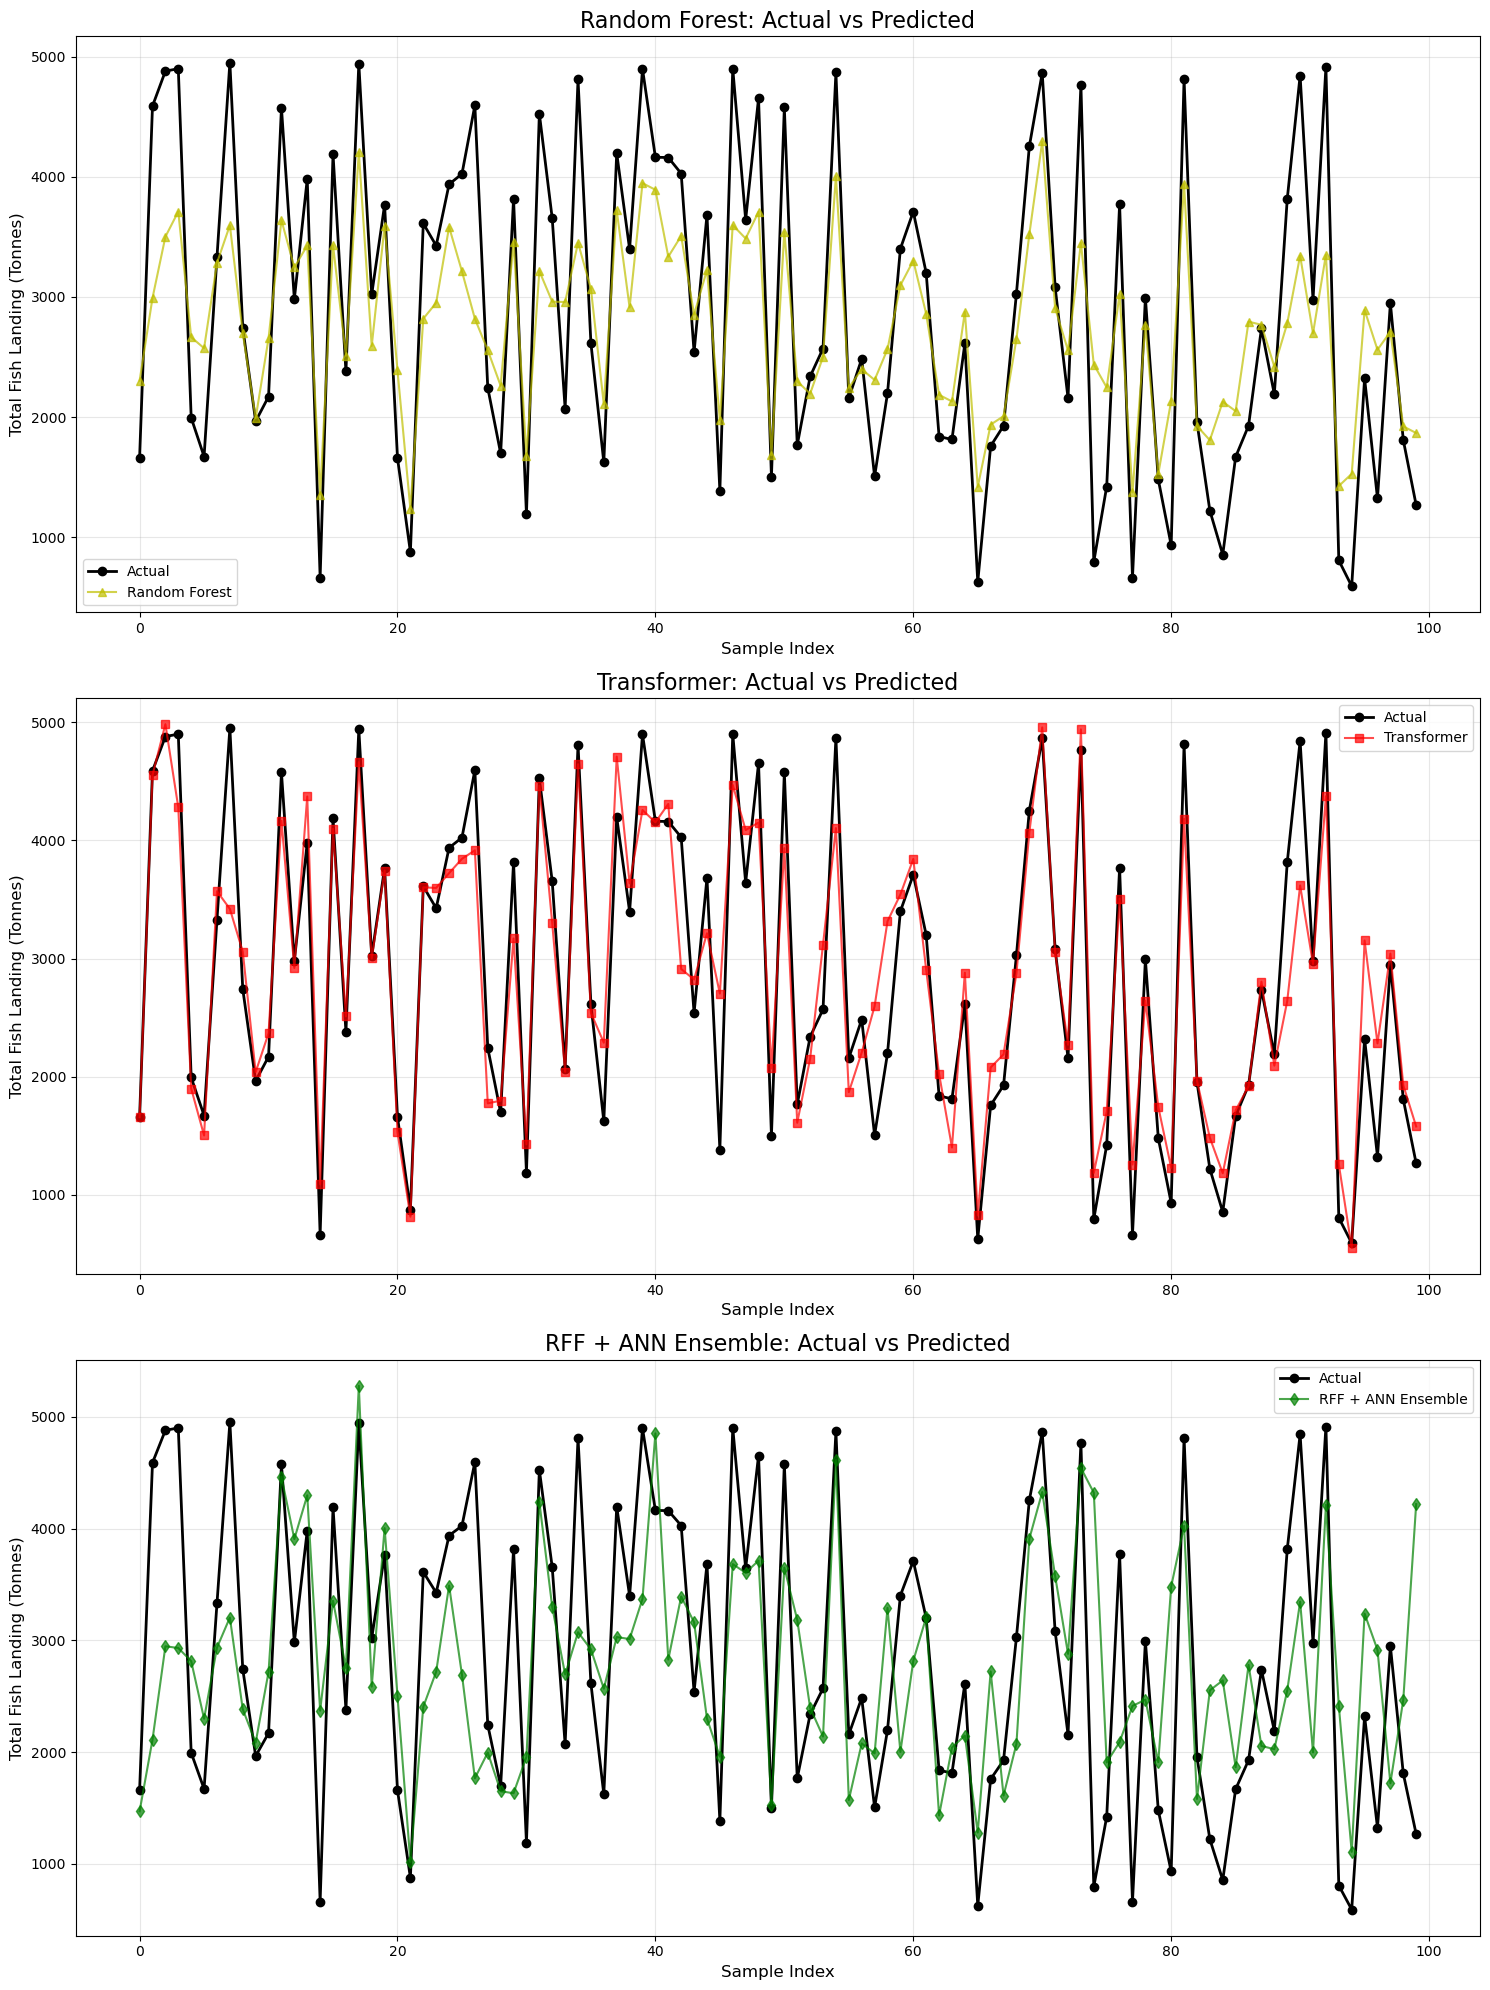

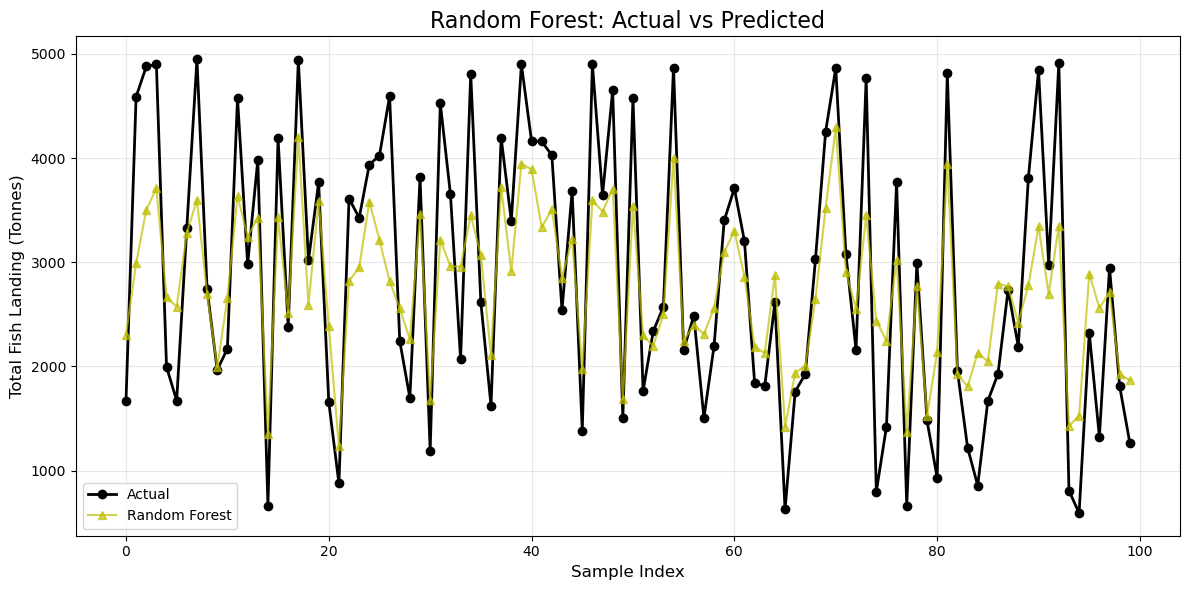

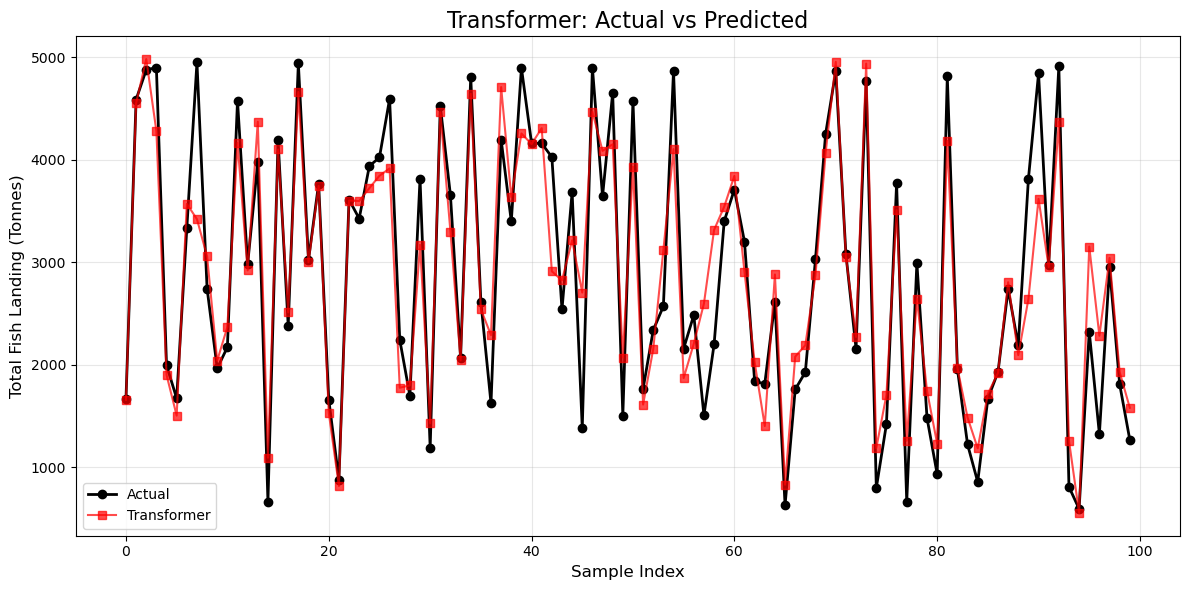

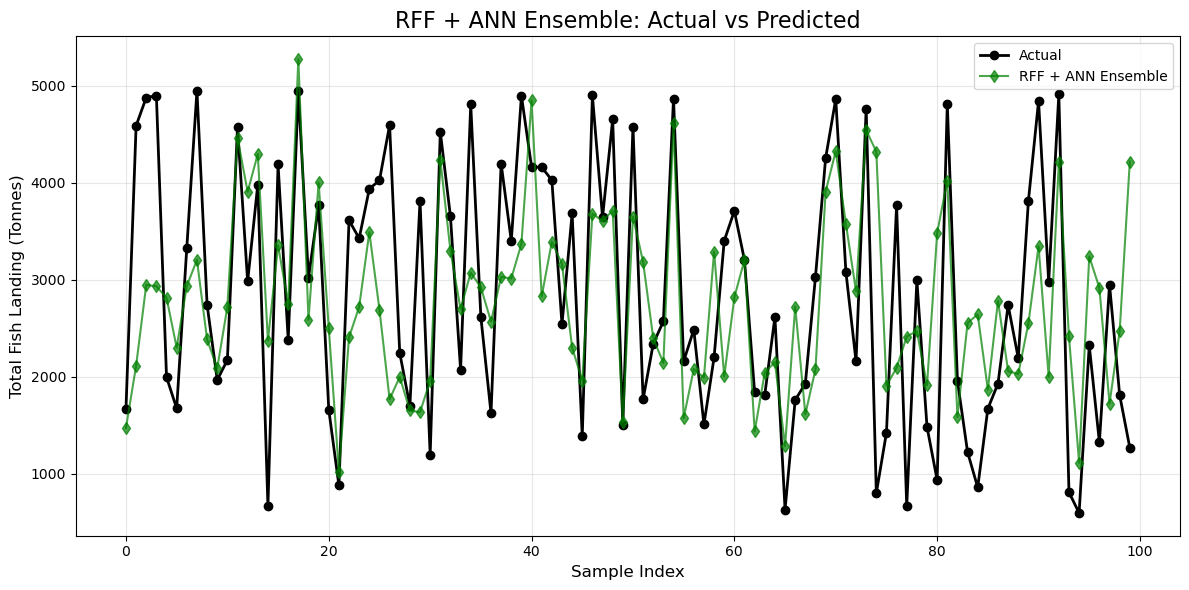


MODEL PERFORMANCE COMPARISON
Model                RMSE       R²        
--------------------------------------------------
Random Forest        783.51     0.6511    
Transformer          497.07     0.8596    
RFF + ANN Ensemble   1080.02    0.3370    

Feature Importance Ranking:
--------------------------------------------------
1. Wind_Speed_mps                 0.1663
2. Dissolved_Oxygen_mg_L          0.1320
3. Wave_Height_m                  0.1313
4. Wave_Period_s                  0.1190
5. Chlorophyll_a_mg_m3            0.1167
6. Sea_Surface_Temperature_C      0.1098
7. pH_Level                       0.0837
8. Salinity_PSU                   0.0776
9. Air_Pressure_hPa               0.0248
10. Month                          0.0173
11. Day                            0.0141
12. Year                           0.0074


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)
torch.manual_seed(42)

# Load and prepare data
def load_data(file_path):
    """Load and preprocess the CSV data"""
    df2 = pd.read_csv("../data/Fish_Population_Expanded_2000.csv")
    
    # Convert Date to Year, Month, Day
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    
    # Define features and target
    features = [
        "Sea_Surface_Temperature_C", "Wave_Height_m", "Wave_Period_s", 
        "Wind_Speed_mps", "Salinity_PSU", "Dissolved_Oxygen_mg_L", 
        "pH_Level", "Air_Pressure_hPa", "Chlorophyll_a_mg_m3", 
        "Year", "Month", "Day"
    ]
    target = "Total_Fish_Landing_Tonnes"
    
    # Split data
    X = df[features]
    y = df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale features
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    
    # Reshape y for scaling
    y_train_reshaped = y_train.values.reshape(-1, 1)
    y_test_reshaped = y_test.values.reshape(-1, 1)
    
    y_train_scaled = scaler_y.fit_transform(y_train_reshaped).flatten()
    y_test_scaled = scaler_y.transform(y_test_reshaped).flatten()
    
    return (X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, 
            X_train, X_test, y_train, y_test, scaler_y, features)

# 1. Random Forest Model
def train_random_forest(X_train, y_train, X_test, y_test, scaler_y):
    """Train and evaluate a Random Forest model"""
    print("Training Random Forest model...")
    rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_scaled = rf_model.predict(X_test)
    
    # Convert predictions back to original scale for evaluation
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
    y_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
    r2 = r2_score(y_actual, y_pred)
    
    print(f"Random Forest - RMSE: {rmse:.2f}, R²: {r2:.4f}")
    
    return rf_model, y_pred

# 2. Neural Network with Self-Attention (Transformer-inspired)
class SelfAttention(nn.Module):
    """Self-attention mechanism for the transformer-inspired model"""
    def __init__(self, embed_size, heads):
        super(SelfAttention, self).__init__()
        self.embed_size = embed_size
        self.heads = heads
        self.head_dim = embed_size // heads
        
        assert (self.head_dim * heads == embed_size), "Embed size needs to be divisible by heads"
        
        self.values = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.keys = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.queries = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.fc_out = nn.Linear(heads * self.head_dim, embed_size)
        
    def forward(self, values, keys, query):
        N = query.shape[0]  # batch size
        value_len, key_len, query_len = values.shape[1], keys.shape[1], query.shape[1]
        
        # Split the embedding into self.heads different pieces
        values = values.reshape(N, value_len, self.heads, self.head_dim)
        keys = keys.reshape(N, key_len, self.heads, self.head_dim)
        query = query.reshape(N, query_len, self.heads, self.head_dim)
        
        values = self.values(values)
        keys = self.keys(keys)
        queries = self.queries(query)
        
        # Scaled dot-product attention
        energy = torch.einsum("nqhd,nkhd->nhqk", [queries, keys])
        attention = torch.softmax(energy / (self.embed_size ** (1/2)), dim=3)
        
        out = torch.einsum("nhql,nlhd->nqhd", [attention, values]).reshape(
            N, query_len, self.heads * self.head_dim
        )
        
        out = self.fc_out(out)
        return out

class TransformerBlock(nn.Module):
    def __init__(self, embed_size, heads, dropout, forward_expansion):
        super(TransformerBlock, self).__init__()
        self.attention = SelfAttention(embed_size, heads)
        self.norm1 = nn.LayerNorm(embed_size)
        self.norm2 = nn.LayerNorm(embed_size)
        
        self.feed_forward = nn.Sequential(
            nn.Linear(embed_size, forward_expansion * embed_size),
            nn.ReLU(),
            nn.Linear(forward_expansion * embed_size, embed_size),
        )
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, value, key, query):
        attention = self.attention(value, key, query)
        
        # Add and norm (first residual connection)
        x = self.norm1(attention + query)
        x = self.dropout(x)
        
        # Feed forward
        forward = self.feed_forward(x)
        
        # Add and norm (second residual connection)
        out = self.norm2(forward + x)
        out = self.dropout(out)
        return out

class TransformerRegressor(nn.Module):
    def __init__(self, input_size, embed_size=64, num_layers=3, heads=4, forward_expansion=4, dropout=0.1):
        super(TransformerRegressor, self).__init__()
        
        self.embed_size = embed_size
        self.input_embedding = nn.Linear(1, embed_size)  # Embed each feature individually
        
        self.transformer_blocks = nn.ModuleList(
            [
                TransformerBlock(
                    embed_size=embed_size,
                    heads=heads,
                    dropout=dropout,
                    forward_expansion=forward_expansion,
                )
                for _ in range(num_layers)
            ]
        )
        
        self.fc_out = nn.Sequential(
            nn.Linear(embed_size * input_size, 128),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(64, 1)
        )
        
    def forward(self, x):
        # x shape: (batch_size, seq_len) -> (batch_size, seq_len, 1)
        x = x.unsqueeze(-1)
        
        # Embed each feature: (batch_size, seq_len, embed_size)
        x = self.input_embedding(x)
        
        # Apply transformer blocks
        for block in self.transformer_blocks:
            x = block(x, x, x)
        
        # Flatten: (batch_size, seq_len * embed_size)
        x = x.reshape(x.shape[0], -1)
        
        # Output layer
        return self.fc_out(x).squeeze()

def train_transformer(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, scaler_y, batch_size=32, epochs=100):
    """Train and evaluate a Transformer-inspired model"""
    print("Training Transformer-inspired model...")
    
    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train_scaled)
    y_train_tensor = torch.FloatTensor(y_train_scaled)
    X_test_tensor = torch.FloatTensor(X_test_scaled)
    y_test_tensor = torch.FloatTensor(y_test_scaled)
    
    # Create datasets and dataloaders
    class FishDataset(Dataset):
        def __init__(self, features, targets):
            self.features = features
            self.targets = targets
            
        def __len__(self):
            return len(self.features)
        
        def __getitem__(self, idx):
            return self.features[idx], self.targets[idx]
    
    train_dataset = FishDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    # Initialize model
    input_size = X_train_scaled.shape[1]
    model = TransformerRegressor(input_size=input_size)
    
    # Loss and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Training loop
    for epoch in range(epochs):
        model.train()
        for features, targets in train_loader:
            # Forward pass
            outputs = model(features)
            loss = criterion(outputs, targets)
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        # Print progress every 10 epochs
        if (epoch + 1) % 20 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")
    
    # Evaluation
    model.eval()
    with torch.no_grad():
        y_pred_scaled = model(X_test_tensor).numpy()
        
    # Convert predictions back to original scale
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
    y_actual = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
    r2 = r2_score(y_actual, y_pred)
    
    print(f"Transformer - RMSE: {rmse:.2f}, R²: {r2:.4f}")
    
    return model, y_pred

# 3. Random Fourier Features (RFF) + Neural Network Ensemble
class RFFLayer(nn.Module):
    """Random Fourier Features layer"""
    def __init__(self, input_dim, output_dim, sigma=1.0):
        super(RFFLayer, self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.sigma = sigma
        
        # Random weights with normal distribution
        self.weights = nn.Parameter(torch.randn(input_dim, output_dim) * (1.0 / sigma), requires_grad=False)
        self.bias = nn.Parameter(2 * np.pi * torch.rand(output_dim), requires_grad=False)
        
    def forward(self, x):
        # Project input
        projection = torch.matmul(x, self.weights) + self.bias
        # Apply cosine activation
        return torch.cos(projection) * np.sqrt(2.0 / self.output_dim)

class RFFEnsembleModel(nn.Module):
    """Ensemble model combining RFF with a neural network"""
    def __init__(self, input_dim, rff_dim=128):
        super(RFFEnsembleModel, self).__init__()
        self.rff = RFFLayer(input_dim, rff_dim)
        
        self.nn = nn.Sequential(
            nn.Linear(rff_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 1)
        )
        
    def forward(self, x):
        x = self.rff(x)
        return self.nn(x).squeeze()

def train_rff_ensemble(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, scaler_y, batch_size=32, epochs=100):
    """Train and evaluate an RFF + ANN ensemble model"""
    print("Training RFF + ANN Ensemble model...")
    
    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train_scaled)
    y_train_tensor = torch.FloatTensor(y_train_scaled)
    X_test_tensor = torch.FloatTensor(X_test_scaled)
    y_test_tensor = torch.FloatTensor(y_test_scaled)
    
    # Create datasets and dataloaders
    class FishDataset(Dataset):
        def __init__(self, features, targets):
            self.features = features
            self.targets = targets
            
        def __len__(self):
            return len(self.features)
        
        def __getitem__(self, idx):
            return self.features[idx], self.targets[idx]
    
    train_dataset = FishDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    # Initialize model
    input_size = X_train_scaled.shape[1]
    model = RFFEnsembleModel(input_dim=input_size)
    
    # Loss and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Training loop
    for epoch in range(epochs):
        model.train()
        for features, targets in train_loader:
            # Forward pass
            outputs = model(features)
            loss = criterion(outputs, targets)
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        # Print progress every 10 epochs
        if (epoch + 1) % 20 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")
    
    # Evaluation
    model.eval()
    with torch.no_grad():
        y_pred_scaled = model(X_test_tensor).numpy()
        
    # Convert predictions back to original scale
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
    y_actual = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
    r2 = r2_score(y_actual, y_pred)
    
    print(f"RFF + ANN Ensemble - RMSE: {rmse:.2f}, R²: {r2:.4f}")
    
    return model, y_pred

# Visualize predictions vs actual values
def visualize_results(y_test, rf_pred, transformer_pred, ensemble_pred, scaler_y=None):
    """Create separate visualizations for each model comparing actual vs predicted values"""
    # Select the first 100 samples for better visualization
    samples = 100
    indices = np.arange(samples)
    
    # If predictions are scaled, convert back to original scale
    if scaler_y is not None:
        y_actual = scaler_y.inverse_transform(y_test[:samples].reshape(-1, 1)).flatten()
        rf_actual = rf_pred[:samples]  # RF predictions are already in original scale
        transformer_actual = transformer_pred[:samples]  # Already in original scale
        ensemble_actual = ensemble_pred[:samples]  # Already in original scale
    else:
        y_actual = y_test[:samples]
        rf_actual = rf_pred[:samples]
        transformer_actual = transformer_pred[:samples]
        ensemble_actual = ensemble_pred[:samples]
    
    # Create a separate plot for each model
    plt.figure(figsize=(15, 20))
    
    # 1. Random Forest - CHANGED COLOR FROM 'b^-' (blue) TO 'y^-' (yellow)
    plt.subplot(3, 1, 1)
    plt.plot(indices, y_actual, 'ko-', label='Actual', linewidth=2, markersize=6)
    plt.plot(indices, rf_actual, 'y^-', label='Random Forest', alpha=0.7)
    plt.title('Random Forest: Actual vs Predicted', fontsize=16)
    plt.xlabel('Sample Index', fontsize=12)
    plt.ylabel('Total Fish Landing (Tonnes)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # 2. Transformer
    plt.subplot(3, 1, 2)
    plt.plot(indices, y_actual, 'ko-', label='Actual', linewidth=2, markersize=6)
    plt.plot(indices, transformer_actual, 'rs-', label='Transformer', alpha=0.7)
    plt.title('Transformer: Actual vs Predicted', fontsize=16)
    plt.xlabel('Sample Index', fontsize=12)
    plt.ylabel('Total Fish Landing (Tonnes)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # 3. RFF + ANN Ensemble
    plt.subplot(3, 1, 3)
    plt.plot(indices, y_actual, 'ko-', label='Actual', linewidth=2, markersize=6)
    plt.plot(indices, ensemble_actual, 'gd-', label='RFF + ANN Ensemble', alpha=0.7)
    plt.title('RFF + ANN Ensemble: Actual vs Predicted', fontsize=16)
    plt.xlabel('Sample Index', fontsize=12)
    plt.ylabel('Total Fish Landing (Tonnes)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('fish_landing_predictions_separate.png')
    
    # Also create individual files for each model
    # Random Forest - CHANGED COLOR FROM 'b^-' (blue) TO 'y^-' (yellow)
    plt.figure(figsize=(12, 6))
    plt.plot(indices, y_actual, 'ko-', label='Actual', linewidth=2, markersize=6)
    plt.plot(indices, rf_actual, 'y^-', label='Random Forest', alpha=0.7)
    plt.title('Random Forest: Actual vs Predicted', fontsize=16)
    plt.xlabel('Sample Index', fontsize=12)
    plt.ylabel('Total Fish Landing (Tonnes)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('random_forest_predictions.png')
    
    # Transformer
    plt.figure(figsize=(12, 6))
    plt.plot(indices, y_actual, 'ko-', label='Actual', linewidth=2, markersize=6)
    plt.plot(indices, transformer_actual, 'rs-', label='Transformer', alpha=0.7)
    plt.title('Transformer: Actual vs Predicted', fontsize=16)
    plt.xlabel('Sample Index', fontsize=12)
    plt.ylabel('Total Fish Landing (Tonnes)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('transformer_predictions.png')
    
    # RFF + ANN Ensemble
    plt.figure(figsize=(12, 6))
    plt.plot(indices, y_actual, 'ko-', label='Actual', linewidth=2, markersize=6)
    plt.plot(indices, ensemble_actual, 'gd-', label='RFF + ANN Ensemble', alpha=0.7)
    plt.title('RFF + ANN Ensemble: Actual vs Predicted', fontsize=16)
    plt.xlabel('Sample Index', fontsize=12)
    plt.ylabel('Total Fish Landing (Tonnes)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('ensemble_predictions.png')
    
    plt.show()

# Main function to run the entire pipeline
def main(file_path='Fish_Population_Expanded_2000.csv'):
    # Load and prepare data
    X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, X_train, X_test, y_train, y_test, scaler_y, features = load_data(file_path)
    
    # Train models
    rf_model, rf_pred = train_random_forest(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, scaler_y)
    transformer_model, transformer_pred = train_transformer(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, scaler_y)
    ensemble_model, ensemble_pred = train_rff_ensemble(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, scaler_y)
    
    # Visualize results
    visualize_results(y_test_scaled, rf_pred, transformer_pred, ensemble_pred, scaler_y)
    
    # Calculate and print aggregate metrics for model comparison
    y_actual = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()
    
    # Create a table of results
    print("\n" + "="*50)
    print("MODEL PERFORMANCE COMPARISON")
    print("="*50)
    print(f"{'Model':<20} {'RMSE':<10} {'R²':<10}")
    print("-"*50)
    print(f"{'Random Forest':<20} {np.sqrt(mean_squared_error(y_actual, rf_pred)):<10.2f} {r2_score(y_actual, rf_pred):<10.4f}")
    print(f"{'Transformer':<20} {np.sqrt(mean_squared_error(y_actual, transformer_pred)):<10.2f} {r2_score(y_actual, transformer_pred):<10.4f}")
    print(f"{'RFF + ANN Ensemble':<20} {np.sqrt(mean_squared_error(y_actual, ensemble_pred)):<10.2f} {r2_score(y_actual, ensemble_pred):<10.4f}")
    print("="*50)
    
    # Print feature importance from Random Forest
    if hasattr(rf_model, 'feature_importances_'):
        importances = rf_model.feature_importances_
        indices = np.argsort(importances)[::-1]
        
        print("\nFeature Importance Ranking:")
        print("-"*50)
        for i, idx in enumerate(indices):
            print(f"{i+1}. {features[idx]:<30} {importances[idx]:.4f}")

if __name__ == "__main__":
    main()

In [30]:
# 1. Code for Random Forest visualization only
def visualize_random_forest(y_test, rf_pred, scaler_y=None, samples=100):
    """Create visualization for Random Forest model comparing actual vs predicted values"""
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Prepare data
    indices = np.arange(samples)
    
    # Convert to original scale if needed
    if scaler_y is not None:
        y_actual = scaler_y.inverse_transform(y_test[:samples].reshape(-1, 1)).flatten()
        rf_actual = rf_pred[:samples]  # RF predictions are already in original scale
    else:
        y_actual = y_test[:samples]
        rf_actual = rf_pred[:samples]
    
    # Create Random Forest plot
    plt.figure(figsize=(12, 6))
    plt.plot(indices, y_actual, 'ko-', label='Actual', linewidth=2, markersize=6)
    plt.plot(indices, rf_actual, 'y^-', label='Random Forest', alpha=0.7)
    plt.title('Random Forest: Actual vs Predicted', fontsize=16)
    plt.xlabel('Sample Index', fontsize=12)
    plt.ylabel('Total Fish Landing (Tonnes)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('random_forest_predictions.png')
    plt.show()

In [31]:
# 2. Code for Transformer visualization only
def visualize_transformer(y_test, transformer_pred, scaler_y=None, samples=100):
    """Create visualization for Transformer model comparing actual vs predicted values"""
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Prepare data
    indices = np.arange(samples)
    
    # Convert to original scale if needed
    if scaler_y is not None:
        y_actual = scaler_y.inverse_transform(y_test[:samples].reshape(-1, 1)).flatten()
        transformer_actual = transformer_pred[:samples]  # Already in original scale
    else:
        y_actual = y_test[:samples]
        transformer_actual = transformer_pred[:samples]
    
    # Create Transformer plot
    plt.figure(figsize=(12, 6))
    plt.plot(indices, y_actual, 'ko-', label='Actual', linewidth=2, markersize=6)
    plt.plot(indices, transformer_actual, 'rs-', label='Transformer', alpha=0.7)
    plt.title('Transformer: Actual vs Predicted', fontsize=16)
    plt.xlabel('Sample Index', fontsize=12)
    plt.ylabel('Total Fish Landing (Tonnes)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('transformer_predictions.png')
    plt.show()

In [32]:
# 3. Code for RFF + ANN Ensemble visualization only
def visualize_ensemble(y_test, ensemble_pred, scaler_y=None, samples=100):
    """Create visualization for RFF + ANN Ensemble model comparing actual vs predicted values"""
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Prepare data
    indices = np.arange(samples)
    
    # Convert to original scale if needed
    if scaler_y is not None:
        y_actual = scaler_y.inverse_transform(y_test[:samples].reshape(-1, 1)).flatten()
        ensemble_actual = ensemble_pred[:samples]  # Already in original scale
    else:
        y_actual = y_test[:samples]
        ensemble_actual = ensemble_pred[:samples]
    
    # Create RFF + ANN Ensemble plot
    plt.figure(figsize=(12, 6))
    plt.plot(indices, y_actual, 'ko-', label='Actual', linewidth=2, markersize=6)
    plt.plot(indices, ensemble_actual, 'gd-', label='RFF + ANN Ensemble', alpha=0.7)
    plt.title('RFF + ANN Ensemble: Actual vs Predicted', fontsize=16)
    plt.xlabel('Sample Index', fontsize=12)
    plt.ylabel('Total Fish Landing (Tonnes)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('ensemble_predictions.png')
    plt.show()

Training Random Forest model...
Random Forest - RMSE: 783.51, R²: 0.6511
Training Transformer-inspired model...
Epoch [20/100], Loss: 0.0476
Epoch [40/100], Loss: 0.0089
Epoch [60/100], Loss: 0.0057
Epoch [80/100], Loss: 0.0086
Epoch [100/100], Loss: 0.0074
Transformer - RMSE: 483.48, R²: 0.8671
Training RFF + ANN Ensemble model...
Epoch [20/100], Loss: 0.0489
Epoch [40/100], Loss: 0.0385
Epoch [60/100], Loss: 0.0561
Epoch [80/100], Loss: 0.0370
Epoch [100/100], Loss: 0.0277
RFF + ANN Ensemble - RMSE: 1096.19, R²: 0.3170


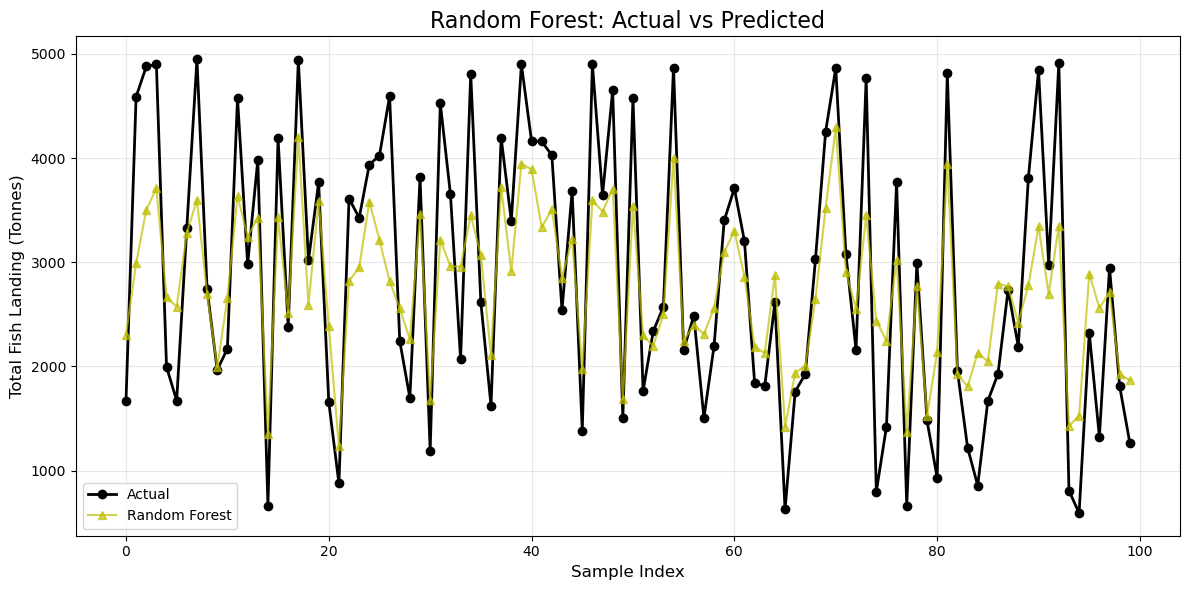

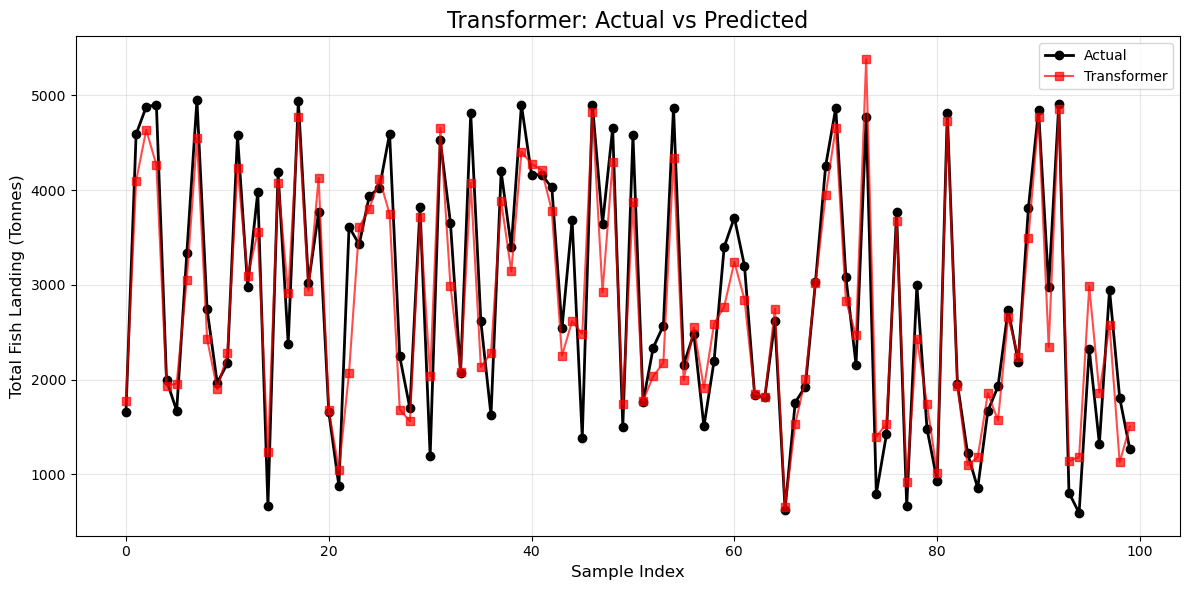

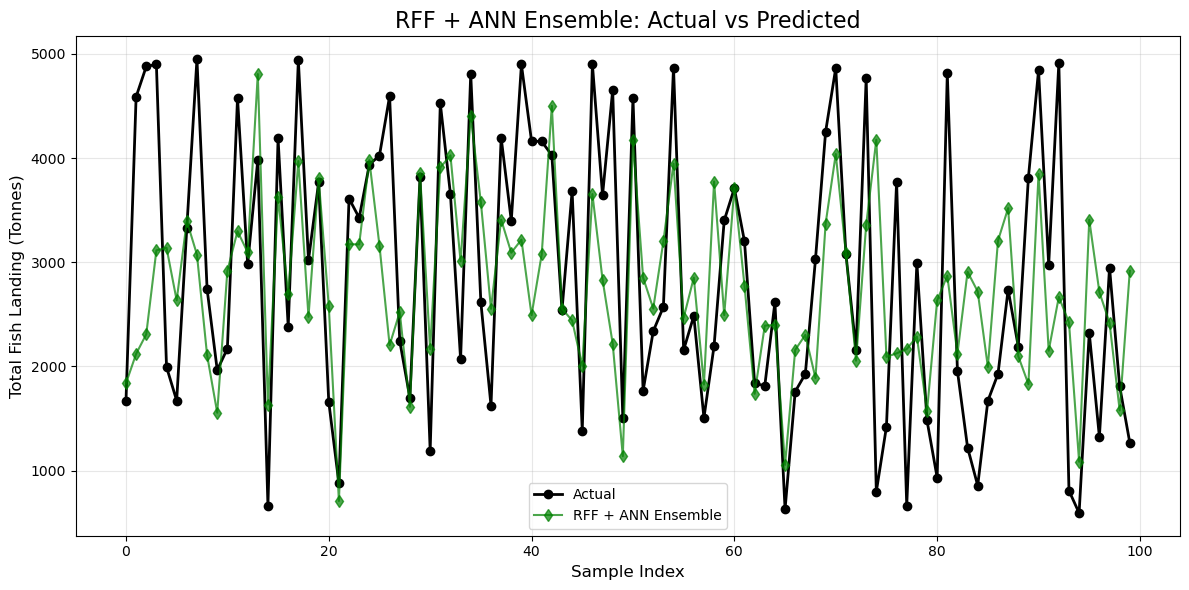


MODEL PERFORMANCE COMPARISON
Model                RMSE       R²        
--------------------------------------------------
Random Forest        783.51     0.6511    
Transformer          483.48     0.8671    
RFF + ANN Ensemble   1096.19    0.3170    

Feature Importance Ranking:
--------------------------------------------------
1. Wind_Speed_mps                 0.1663
2. Dissolved_Oxygen_mg_L          0.1320
3. Wave_Height_m                  0.1313
4. Wave_Period_s                  0.1190
5. Chlorophyll_a_mg_m3            0.1167
6. Sea_Surface_Temperature_C      0.1098
7. pH_Level                       0.0837
8. Salinity_PSU                   0.0776
9. Air_Pressure_hPa               0.0248
10. Month                          0.0173
11. Day                            0.0141
12. Year                           0.0074


In [33]:
# Example of how to use these separate visualization functions in your main code

def main(file_path='Fish_Population_Expanded_2000.csv'):
    # Load and prepare data
    X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, X_train, X_test, y_train, y_test, scaler_y, features = load_data(file_path)
    
    # Train models
    rf_model, rf_pred = train_random_forest(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, scaler_y)
    transformer_model, transformer_pred = train_transformer(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, scaler_y)
    ensemble_model, ensemble_pred = train_rff_ensemble(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, scaler_y)
    
    # Visualize results with separate functions
    # Each one will appear in its own cell and can be executed independently
    visualize_random_forest(y_test_scaled, rf_pred, scaler_y)
    visualize_transformer(y_test_scaled, transformer_pred, scaler_y)
    visualize_ensemble(y_test_scaled, ensemble_pred, scaler_y)
    
    # Calculate and print aggregate metrics for model comparison
    y_actual = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()
    
    # Create a table of results
    print("\n" + "="*50)
    print("MODEL PERFORMANCE COMPARISON")
    print("="*50)
    print(f"{'Model':<20} {'RMSE':<10} {'R²':<10}")
    print("-"*50)
    print(f"{'Random Forest':<20} {np.sqrt(mean_squared_error(y_actual, rf_pred)):<10.2f} {r2_score(y_actual, rf_pred):<10.4f}")
    print(f"{'Transformer':<20} {np.sqrt(mean_squared_error(y_actual, transformer_pred)):<10.2f} {r2_score(y_actual, transformer_pred):<10.4f}")
    print(f"{'RFF + ANN Ensemble':<20} {np.sqrt(mean_squared_error(y_actual, ensemble_pred)):<10.2f} {r2_score(y_actual, ensemble_pred):<10.4f}")
    print("="*50)
    
    # Print feature importance from Random Forest
    if hasattr(rf_model, 'feature_importances_'):
        importances = rf_model.feature_importances_
        indices = np.argsort(importances)[::-1]
        
        print("\nFeature Importance Ranking:")
        print("-"*50)
        for i, idx in enumerate(indices):
            print(f"{i+1}. {features[idx]:<30} {importances[idx]:.4f}")

if __name__ == "__main__":
    main()